In [2]:
library(scales)
library(Seurat)
library(dplyr)
library(magrittr)
IRdisplay::display_html("<style> .container { width:95% !important; } </style>")
library("xlsx")

library(ggplot2)
library(scales)
library(reshape2)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
P23M<-readRDS(file ="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23M.rds")
P35M<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35M.rds")
AM<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AM.rds")
Cast<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/Cast.rds")
P23F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23F.rds")
P35F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35F.rds")
AF<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AF.rds")
OVX<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/OVX.rds")

# assgin clusters to cell types

In [4]:
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


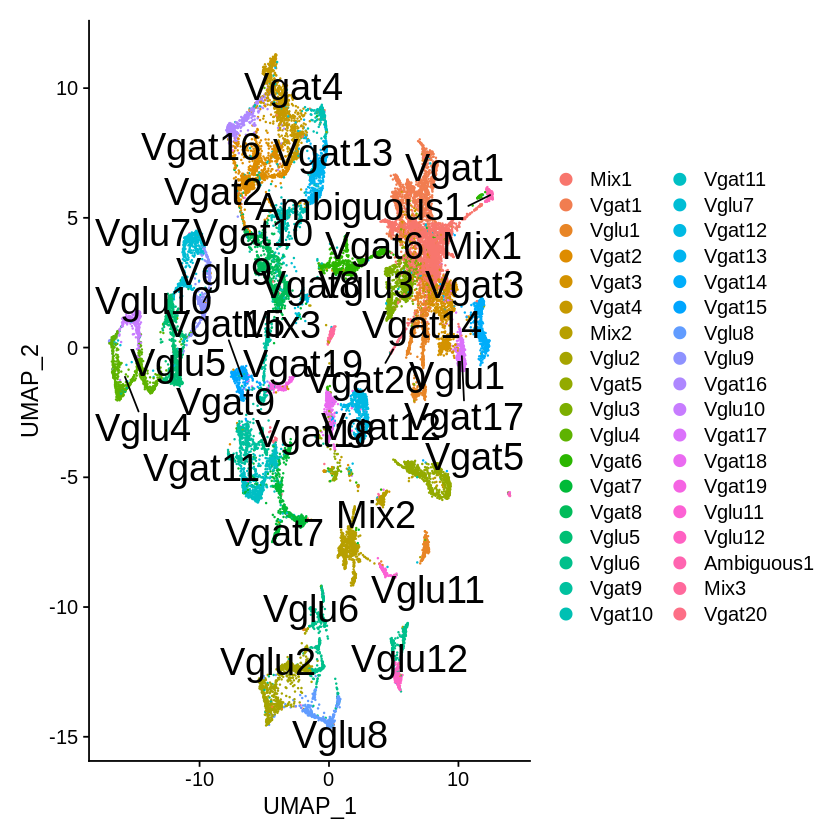

In [6]:
DimPlot(object = MPOA.integrated, reduction = "umap", label = TRUE, repel = TRUE,label.size = 8) 
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/Neurons_umap_name_2000_40.pdf",width=10,height=10)

# Cell type analysis in each condition

In [19]:
#identifying cluster barcodes in each condition
# exp. Oligo_1_barcode_ctrl gives all barcodes in it
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_P23M",sep=""),intersect(colnames(P23M@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P35M",sep=""),intersect(colnames(P35M@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_AM",sep=""),intersect(colnames(AM@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_Cast",sep=""),intersect(colnames(Cast@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P23F",sep=""),intersect(colnames(P23F@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P35F",sep=""),intersect(colnames(P35F@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_AF",sep=""),intersect(colnames(AF@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_OVX",sep=""),intersect(colnames(OVX@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}

# Feature maps

In [6]:
type<-numeric()
for(i in 1:dim(MPOA.integrated@meta.data)[1]){
    type[i]<-new.ident[[MPOA.integrated@meta.data$seurat_clusters[i]]]
}
type<-factor(type,levels=new.ident)
MPOA.integrated@meta.data$type<-type
#need to remove ambiguous1
MPOA.integrated@meta.data<-subset(MPOA.integrated@meta.data,type!="Ambiguous1")

In [22]:
#number of clusters
length(unique(MPOA.integrated@meta.data$type))
#number of cells
dim(MPOA.integrated@meta.data)[1]
#median UMI
median(MPOA.integrated@meta.data$nCount_RNA)
#median gene
median(MPOA.integrated@meta.data$nFeature_RNA)
#% of Vgat cells
100*sum(grepl("Vgat",MPOA.integrated@meta.data$type))/dim(MPOA.integrated@meta.data)[1]
sum(grepl("Vgat",MPOA.integrated@meta.data$type))
#% of Vglu cells
100*sum(grepl("Vglu",MPOA.integrated@meta.data$type))/dim(MPOA.integrated@meta.data)[1]
sum(grepl("Vglu",MPOA.integrated@meta.data$type))
#% of Mix cells
100*sum(grepl("Mix",MPOA.integrated@meta.data$type))/dim(MPOA.integrated@meta.data)[1]

[1] 35

[1] 24627

[1] 5395

[1] 2592

[1] 54.14383

[1] 13334

[1] 31.09595

[1] 7658

[1] 14.76022

In [191]:
Idents(MPOA.integrated)<-factor(Idents(MPOA.integrated),levels=c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20","Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12","Mix1","Mix2","Mix3"))

In [204]:
color<-c("lightblue","lightskyblue","skyblue","deepskyblue","lightsteelblue",
         "dodgerblue","cornflowerblue","steelblue","cadetblue","mediumslateblue",
         "slateblue","darkslateblue","royalblue","blue","mediumblue",
         "darkblue","navy","midnightblue","blueviolet","#4B0082",
         "lightsalmon","salmon","darksalmon","lightcoral","indianred",
         "#DC143C","firebrick","red","darkred","maroon",
         "tomato","orangered","darkgray","dimgray","slategray")

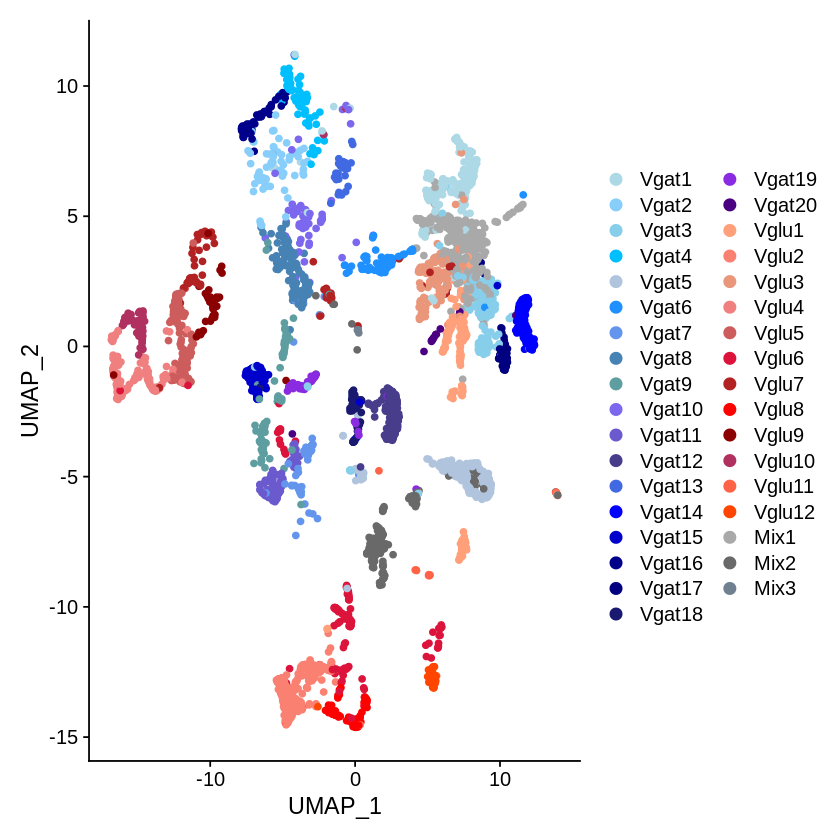

In [205]:
MPOA_P23M<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="P23M")))
DimPlot(object = MPOA_P23M, reduction = "umap",  label = FALSE, repel = TRUE,pt.size =1.5,cols=color) 
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/Neurons_umap_number_2000_40_celltype_P23M.pdf",width=8,height=10)

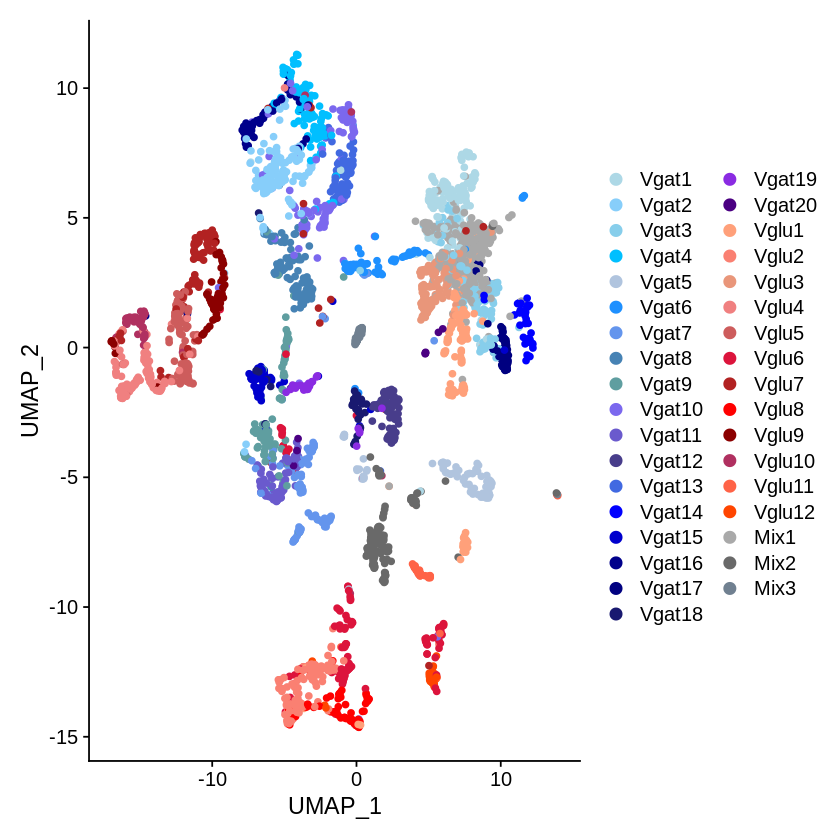

In [206]:
MPOA_P35M<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="P35M")))
DimPlot(object = MPOA_P35M, reduction = "umap",  label = FALSE, repel = TRUE,pt.size =1.5,cols=color) 
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/Neurons_umap_number_2000_40_celltype_P35M.pdf",width=8,height=10)

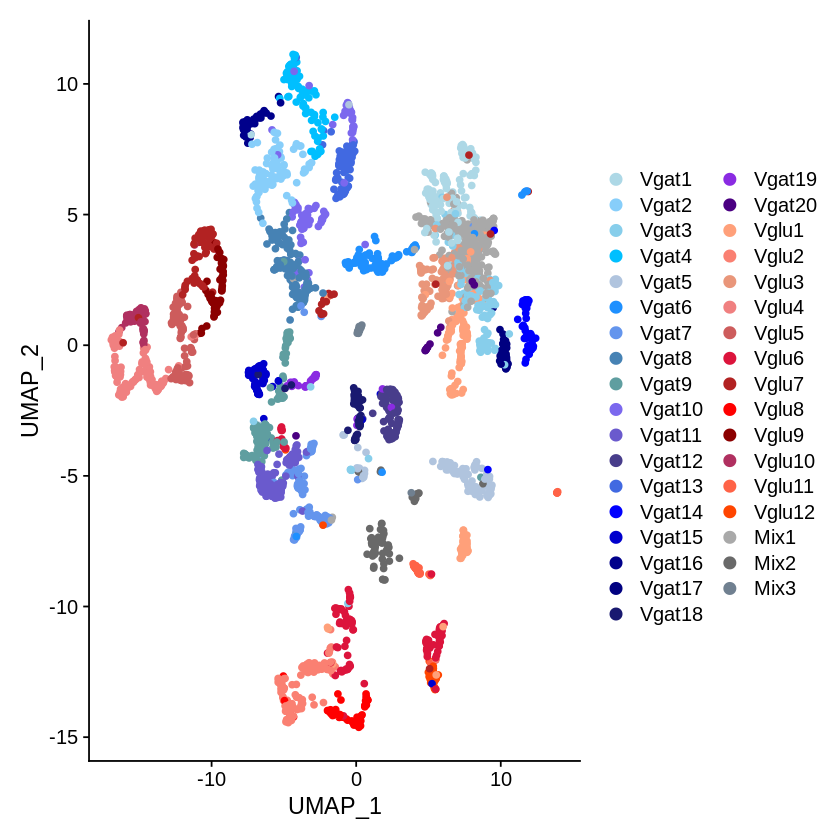

In [207]:
MPOA_AM<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AM")))
DimPlot(object = MPOA_AM, reduction = "umap",  label = FALSE, repel = TRUE,pt.size =1.5,cols=color) 
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/Neurons_umap_number_2000_40_celltype_AM.pdf",width=8,height=10)

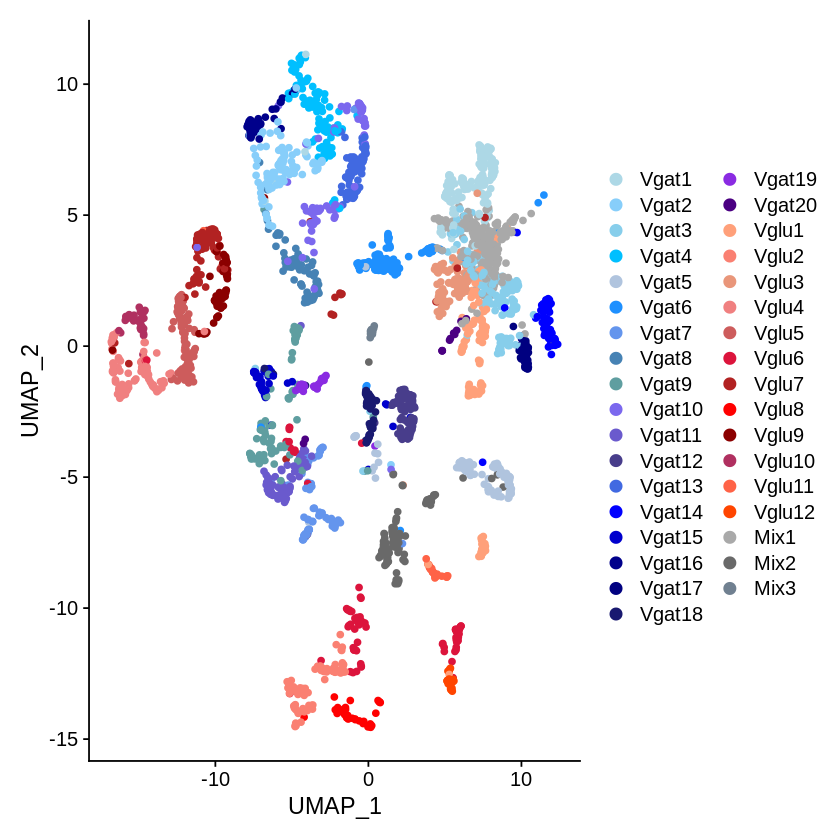

In [208]:
MPOA_Cast<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="Cast")))
DimPlot(object = MPOA_Cast, reduction = "umap",  label = FALSE, repel = TRUE,pt.size =1.5,cols=color) 
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/Neurons_umap_number_2000_40_celltype_Cast.pdf",width=8,height=10)

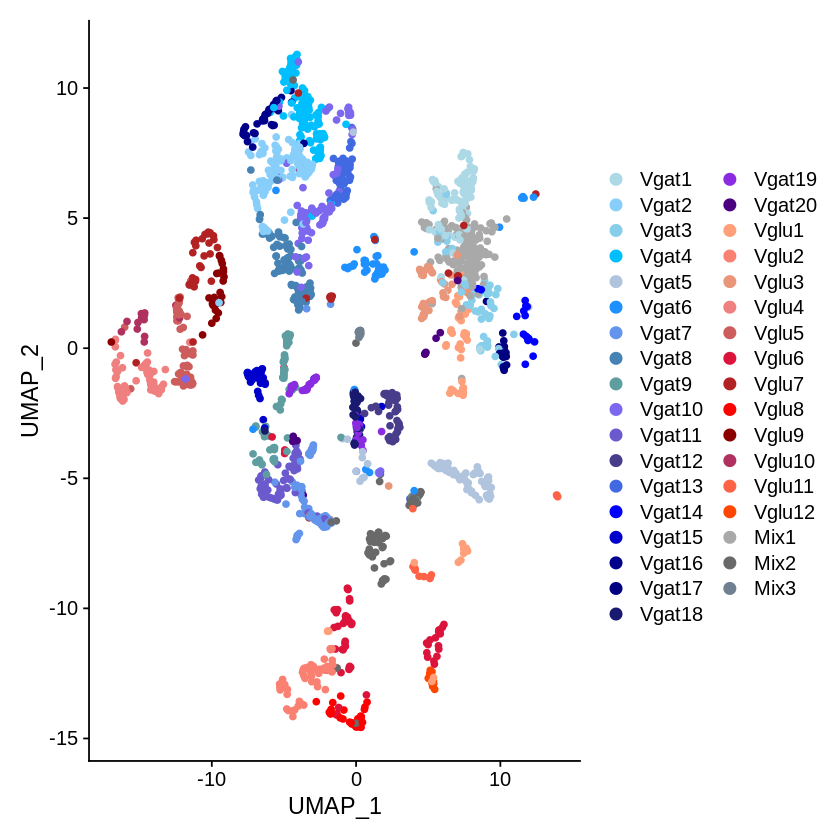

In [209]:
MPOA_P23F<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="P23F")))
DimPlot(object = MPOA_P23F, reduction = "umap",  label = FALSE, repel = TRUE,pt.size =1.5,cols=color) 
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/Neurons_umap_number_2000_40_celltype_P23F.pdf",width=8,height=10)

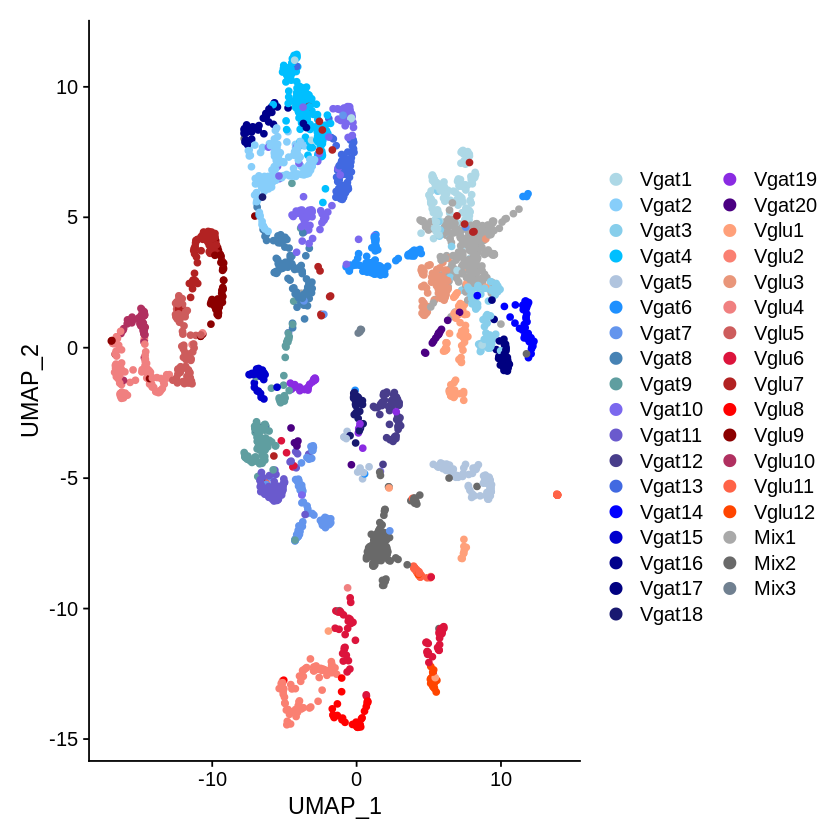

In [210]:
MPOA_P35F<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="P35F")))
DimPlot(object = MPOA_P35F, reduction = "umap",  label = FALSE, repel = TRUE,pt.size =1.5,cols=color) 
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/Neurons_umap_number_2000_40_celltype_P35F.pdf",width=8,height=10)

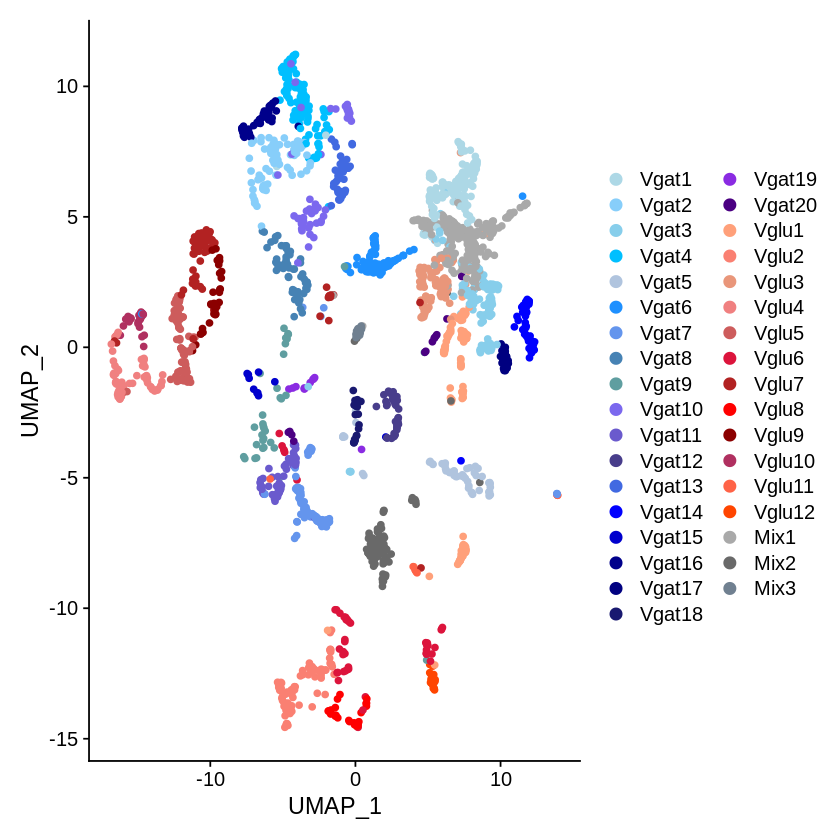

In [211]:
MPOA_AF<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AF")))
DimPlot(object = MPOA_AF, reduction = "umap",  label = FALSE, repel = TRUE,pt.size =1.5,cols=color) 
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/Neurons_umap_number_2000_40_celltype_AF.pdf",width=8,height=10)

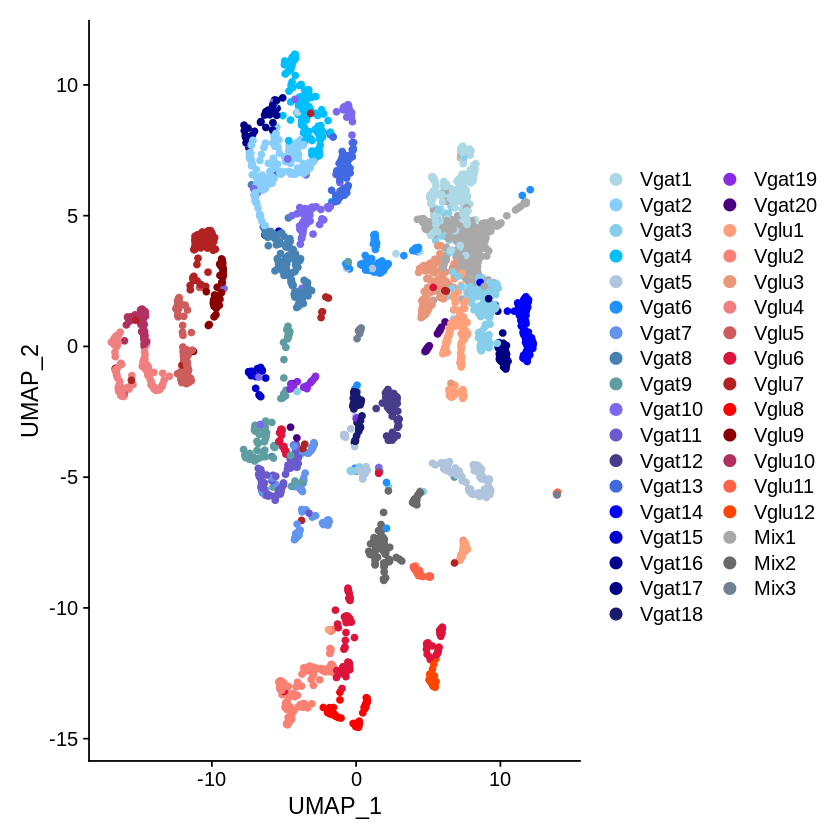

In [212]:
MPOA_OVX<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="OVX")))
DimPlot(object = MPOA_OVX, reduction = "umap",  label = FALSE, repel = TRUE,pt.size =1.5,cols=color) 
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/Neurons_umap_number_2000_40_celltype_OVX.pdf",width=8,height=10)

# conserved markers for clusters

In [50]:
#Cell_type<-c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vglu1","Vglu2","Vglu3","Vglu4","Mix1","Mix2","Mix3","Ambiguous")
for (i in 1:length(new.ident)){
one.markers <- FindConservedMarkers(MPOA.integrated, ident.1 = new.ident[i], grouping.var = "stim",print.bar = FALSE,min.cells.gene = 3, min.cells.group = 1)
sort_marker<-one.markers[order(-one.markers["AM_avg_logFC"]),]
write.xlsx2(sort_marker,file=(paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/Neurons/conserved_markers/integrated/",new.ident[i],"_gene.xlsx",sep="")))}

Testing group P23F: (Mix1) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vgat13, Vglu5, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group AF: (Mix1) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vgat13, Vglu5, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group P35F: (Mix1) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vgat13, Vglu5, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group Cast: (Mix1) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vgat13, Vglu5, Vgat18, Vglu3

Testing group P23M: (Vgat2) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group P23F: (Vgat3) vs (Vgat7, Mix2, Vgat5, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group AF: (Vgat3) vs (Vgat7, Mix2, Vgat5, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group P35F: (Vgat3) vs (Vgat7, Mix2, Vgat5, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3

Testing group P35M: (Vgat6) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat13, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group P23M: (Vgat6) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat13, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group P23F: (Vgat7) vs (Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group AF: (Vgat7) vs (Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3

Testing group AM: (Vgat9) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group P35M: (Vgat9) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group P23M: (Vgat9) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group P23F: (Vgat10) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat16, Vgat14, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3

Testing group OVX: (Vgat11) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat15, Low1)
Testing group AM: (Vgat11) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat15, Low1)
Testing group P35M: (Vgat11) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat15, Low1)
Testing group P23M: (Vgat11) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vgat13, Vglu5, Mix1, Vgat18

Testing group Cast: (Vgat13) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group OVX: (Vgat13) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group AM: (Vgat13) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group P35M: (Vgat13) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vglu5, Mix1, Vgat18, Vglu3,

Testing group P35F: (Vgat14) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group Cast: (Vgat14) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group OVX: (Vgat14) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group AM: (Vgat14) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat16, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3,

Testing group AF: (Vgat16) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat14, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group P35F: (Vgat16) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat14, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group Cast: (Vgat16) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat14, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group OVX: (Vgat16) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat19, Vgat2, Vglu6, Vgat10, Vgat14, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3,

Testing group P23F: (Vgat19) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group AF: (Vgat19) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group P35F: (Vgat19) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3, Vglu4, Vglu2, Vglu7, Vglu1, Vglu10, Vglu8, Vglu9, Vgat20, Vglu11, Vgat11, Vgat15, Low1)
Testing group Cast: (Vgat19) vs (Vgat7, Mix2, Vgat5, Vgat3, Vgat1, Vgat17, Vgat8, Vgat12, Vgat4, Vgat9, Vgat2, Vglu6, Vgat10, Vgat16, Vgat14, Vgat6, Vgat13, Vglu5, Mix1, Vgat18, Vglu3

In [14]:
#counting the total number of marker genes

In [15]:
files<-list.files(path="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/conserved_markers/RNA/",pattern="*.xlsx",full.names=TRUE)
marker<-numeric()
for(i in 1:length(files)){
temp<-subset(read.xlsx(files[i],sheetIndex=1),AF_p_val<0.05 & AF_avg_logFC>0)[,1]
marker<-c(marker,temp)
}
length(unique(marker))

[1] 434

# Cell_number

In [6]:
# absolute %
Cell_type<-c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")

# make a data frame for cell number (this data frame is a simple version giving single value for each cluster) 
Cell_number<- data.frame("type" =c(Cell_type,Cell_type,Cell_type,Cell_type), "Cond" = c(rep("P23M",length(Cell_type)),rep("P35M",length(Cell_type)),rep("AM",length(Cell_type)),rep("Cast",length(Cell_type)),rep("P23F",length(Cell_type)),rep("P35F",length(Cell_type)),rep("AF",length(Cell_type)),rep("OVX",length(Cell_type))))
# be careful with how you define factor and levels
as.factor(Cell_number$type)
levels(Cell_number$type)<-c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
as.factor(Cell_number$Cond)
levels(Cell_number$Cond)<-c("P23M","P35M","AM","Cast","P23F","P35F","AF","OVX")

Numberofcells<-vector(mode="numeric", length=0)
proportion<-vector(mode="numeric", length=0)
Esr1<-vector(mode="numeric", length=0)
Ar<-vector(mode="numeric", length=0)

for (i in 1:dim(Cell_number)[1]){if (exists(paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))){
    Numberofcells[i]<-length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))}
                                else{Numberofcells[i]<-0}}
Cell_number$len<-Numberofcells

for (i in 1:dim(Cell_number)[1]){if (Cell_number$Cond[i]=="AM"){proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("AM",Cell_number$Cond)])
                                                               Esr1[i]<-100*sum(MPOA.integrated@assays$RNA["Esr1",eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]
                                                               Ar[i]<-100*sum(MPOA.integrated@assays$RNA["Ar",eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]} 
                                 else if(Cell_number$Cond[i]=="Cast") {proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("Cast",Cell_number$Cond)])
                                                                      Esr1[i]<-100*sum(MPOA.integrated@assays$RNA["Esr1",eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]
                                                                      Ar[i]<-100*sum(MPOA.integrated@assays$RNA["Ar",eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]}
     else if(Cell_number$Cond[i]=="P35M") {proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("P35M",Cell_number$Cond)])
                                          Esr1[i]<-100*sum(MPOA.integrated@assays$RNA["Esr1",eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]
                                          Ar[i]<-100*sum(MPOA.integrated@assays$RNA["Ar",eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]}
       else if(Cell_number$Cond[i]=="P23M") {proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("P23M",Cell_number$Cond)])
                                            Esr1[i]<-100*sum(MPOA.integrated@assays$RNA["Esr1",eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]
                                            Ar[i]<-100*sum(MPOA.integrated@assays$RNA["Ar",eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]}  
else if(Cell_number$Cond[i]=="OVX") {proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("OVX",Cell_number$Cond)])
                                    Esr1[i]<-100*sum(MPOA.integrated@assays$RNA["Esr1",eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]
                                    Ar[i]<-100*sum(MPOA.integrated@assays$RNA["Ar",eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]}
    else if(Cell_number$Cond[i]=="P23F") {proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("P23F",Cell_number$Cond)])
                                         Esr1[i]<-100*sum(MPOA.integrated@assays$RNA["Esr1",eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]
                                         Ar[i]<-100*sum(MPOA.integrated@assays$RNA["Ar",eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]}
        else if(Cell_number$Cond[i]=="P35F") {proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("P35F",Cell_number$Cond)])
                                             Esr1[i]<-100*sum(MPOA.integrated@assays$RNA["Esr1",eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]
                                             Ar[i]<-100*sum(MPOA.integrated@assays$RNA["Ar",eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]}
            else if(Cell_number$Cond[i]=="AF") {proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("AF",Cell_number$Cond)])
                                               Esr1[i]<-100*sum(MPOA.integrated@assays$RNA["Esr1",eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]
                                               Ar[i]<-100*sum(MPOA.integrated@assays$RNA["Ar",eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep="")))]>0)/Cell_number$len[i]}}
Cell_number$prop<-proportion

Cell_number$Esr1<-Esr1
Cell_number$Ar<-Ar


[1] Mix1       Vgat1      Vglu1      Vgat2      Vgat3      Vgat4     
  [7] Mix2       Vglu2      Vgat5      Vglu3      Vglu4      Vgat6     
 [13] Vgat7      Vgat8      Vglu5      Vglu6      Vgat9      Vgat10    
 [19] Vgat11     Vglu7      Vgat12     Vgat13     Vgat14     Vgat15    
 [25] Vglu8      Vglu9      Vgat16     Vglu10     Vgat17     Vgat18    
 [31] Vgat19     Vglu11     Vglu12     Ambiguous1 Mix3       Vgat20    
 [37] Mix1       Vgat1      Vglu1      Vgat2      Vgat3      Vgat4     
 [43] Mix2       Vglu2      Vgat5      Vglu3      Vglu4      Vgat6     
 [49] Vgat7      Vgat8      Vglu5      Vglu6      Vgat9      Vgat10    
 [55] Vgat11     Vglu7      Vgat12     Vgat13     Vgat14     Vgat15    
 [61] Vglu8      Vglu9      Vgat16     Vglu10     Vgat17     Vgat18    
 [67] Vgat19     Vglu11     Vglu12     Ambiguous1 Mix3       Vgat20    
 [73] Mix1       Vgat1      Vglu1      Vgat2      Vgat3      Vgat4     
 [79] Mix2       Vglu2      Vgat5      Vglu3      Vglu4      Vgat6     
 [85] Vgat7      Vgat8      Vglu5      Vglu6      Vgat9      Vgat10    
 [91] Vgat11     Vglu7      Vgat12     Vgat13     Vgat14     Vgat15    
 [97] Vglu8      Vglu9      Vgat16     Vglu10     Vgat17     Vgat18    
[103] Vgat19     Vglu11     Vglu12     Ambiguous1 Mix3       Vgat20    
[109] Mix1       Vgat1      Vglu1      Vgat2      Vgat3      Vgat4     
[115] Mix2       Vglu2      Vgat5      Vglu3      Vglu4      Vgat6     
[121] Vgat7      Vgat8      Vglu5      Vglu6      Vgat9      Vgat10    
[127] Vgat11     Vglu7      Vgat12     Vgat13     Vgat14     Vgat15    
[133] Vglu8      Vglu9      Vgat16     Vglu10     Vgat17     Vgat18    
[139] Vgat19     Vglu11     Vglu12     Ambiguous1 Mix3       Vgat20    
[145] Mix1       Vgat1      Vglu1      Vgat2      Vgat3      Vgat4     
[151] Mix2       Vglu2      Vgat5      Vglu3      Vglu4      Vgat6     
[157] Vgat7      Vgat8      Vglu5      Vglu6      Vgat9      Vgat10    
[163] Vgat11     Vglu7      Vgat12     Vgat13     Vgat14     Vgat15    
[169] Vglu8      Vglu9      Vgat16     Vglu10     Vgat17     Vgat18    
[175] Vgat19     Vglu11     Vglu12     Ambiguous1 Mix3       Vgat20    
[181] Mix1       Vgat1      Vglu1      Vgat2      Vgat3      Vgat4     
[187] Mix2       Vglu2      Vgat5      Vglu3      Vglu4      Vgat6     
[193] Vgat7      Vgat8      Vglu5      Vglu6      Vgat9      Vgat10    
[199] Vgat11     Vglu7      Vgat12     Vgat13     Vgat14     Vgat15    
[205] Vglu8      Vglu9      Vgat16     Vglu10     Vgat17     Vgat18    
[211] Vgat19     Vglu11     Vglu12     Ambiguous1 Mix3       Vgat20    
[217] Mix1       Vgat1      Vglu1      Vgat2      Vgat3      Vgat4     
[223] Mix2       Vglu2      Vgat5      Vglu3      Vglu4      Vgat6     
[229] Vgat7      Vgat8      Vglu5      Vglu6      Vgat9      Vgat10    
[235] Vgat11     Vglu7      Vgat12     Vgat13     Vgat14     Vgat15    
[241] Vglu8      Vglu9      Vgat16     Vglu10     Vgat17     Vgat18    
[247] Vgat19     Vglu11     Vglu12     Ambiguous1 Mix3       Vgat20    
[253] Mix1       Vgat1      Vglu1      Vgat2      Vgat3      Vgat4     
[259] Mix2       Vglu2      Vgat5      Vglu3      Vglu4      Vgat6     
[265] Vgat7      Vgat8      Vglu5      Vglu6      Vgat9      Vgat10    
[271] Vgat11     Vglu7      Vgat12     Vgat13     Vgat14     Vgat15    
[277] Vglu8      Vglu9      Vgat16     Vglu10     Vgat17     Vgat18    
[283] Vgat19     Vglu11     Vglu12     Ambiguous1 Mix3       Vgat20    
36 Levels: Ambiguous1 Mix1 Mix2 Mix3 Vgat1 Vgat10 Vgat11 Vgat12 ... Vglu9

[1] P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M
 [16] P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M
 [31] P23M P23M P23M P23M P23M P23M P35M P35M P35M P35M P35M P35M P35M P35M P35M
 [46] P35M P35M P35M P35M P35M P35M P35M P35M P35M P35M P35M P35M P35M P35M P35M
 [61] P35M P35M P35M P35M P35M P35M P35M P35M P35M P35M P35M P35M AM   AM   AM  
 [76] AM   AM   AM   AM   AM   AM   AM   AM   AM   AM   AM   AM   AM   AM   AM  
 [91] AM   AM   AM   AM   AM   AM   AM   AM   AM   AM   AM   AM   AM   AM   AM  
[106] AM   AM   AM   Cast Cast Cast Cast Cast Cast Cast Cast Cast Cast Cast Cast
[121] Cast Cast Cast Cast Cast Cast Cast Cast Cast Cast Cast Cast Cast Cast Cast
[136] Cast Cast Cast Cast Cast Cast Cast Cast Cast P23F P23F P23F P23F P23F P23F
[151] P23F P23F P23F P23F P23F P23F P23F P23F P23F P23F P23F P23F P23F P23F P23F
[166] P23F P23F P23F P23F P23F P23F P23F P23F P23F P23F P23F P23F P23F P23F P23F
[181] P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F
[196] P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F
[211] P35F P35F P35F P35F P35F P35F AF   AF   AF   AF   AF   AF   AF   AF   AF  
[226] AF   AF   AF   AF   AF   AF   AF   AF   AF   AF   AF   AF   AF   AF   AF  
[241] AF   AF   AF   AF   AF   AF   AF   AF   AF   AF   AF   AF   OVX  OVX  OVX 
[256] OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX 
[271] OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX 
[286] OVX  OVX  OVX 
Levels: AF AM Cast OVX P23F P23M P35F P35M

In [159]:
# 201124 relative % of cells between groups while adjusting by total number, extFig2, remove ambiguous
Cell_type<-c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20","Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12","Mix1","Mix2","Mix3")

# make a data frame for cell number (this data frame is a simple version giving single value for each cluster) 
Cell_number<- data.frame("type" =c(Cell_type,Cell_type,Cell_type,Cell_type), "Cond" = c(rep("P23M",length(Cell_type)),rep("P35M",length(Cell_type)),rep("AM",length(Cell_type)),rep("Cast",length(Cell_type)),rep("P23F",length(Cell_type)),rep("P35F",length(Cell_type)),rep("AF",length(Cell_type)),rep("OVX",length(Cell_type))))
# be careful with how you define factor and levels
as.factor(Cell_number$type)
levels(Cell_number$type)<-c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20","Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12","Mix1","Mix2","Mix3")
as.factor(Cell_number$Cond)
levels(Cell_number$Cond)<-c("P23M","P35M","AM","Cast","P23F","P35F","AF","OVX")

Numberofcells<-vector(mode="numeric", length=0)
proportion<-vector(mode="numeric", length=0)

for (i in 1:dim(Cell_number)[1]){if (exists(paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))){
    Numberofcells[i]<-length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))}
                                else{Numberofcells[i]<-0}}
Cell_number$len<-Numberofcells



[1] Vgat1  Vgat2  Vgat3  Vgat4  Vgat5  Vgat6  Vgat7  Vgat8  Vgat9  Vgat10
 [11] Vgat11 Vgat12 Vgat13 Vgat14 Vgat15 Vgat16 Vgat17 Vgat18 Vgat19 Vgat20
 [21] Vglu1  Vglu2  Vglu3  Vglu4  Vglu5  Vglu6  Vglu7  Vglu8  Vglu9  Vglu10
 [31] Vglu11 Vglu12 Mix1   Mix2   Mix3   Vgat1  Vgat2  Vgat3  Vgat4  Vgat5 
 [41] Vgat6  Vgat7  Vgat8  Vgat9  Vgat10 Vgat11 Vgat12 Vgat13 Vgat14 Vgat15
 [51] Vgat16 Vgat17 Vgat18 Vgat19 Vgat20 Vglu1  Vglu2  Vglu3  Vglu4  Vglu5 
 [61] Vglu6  Vglu7  Vglu8  Vglu9  Vglu10 Vglu11 Vglu12 Mix1   Mix2   Mix3  
 [71] Vgat1  Vgat2  Vgat3  Vgat4  Vgat5  Vgat6  Vgat7  Vgat8  Vgat9  Vgat10
 [81] Vgat11 Vgat12 Vgat13 Vgat14 Vgat15 Vgat16 Vgat17 Vgat18 Vgat19 Vgat20
 [91] Vglu1  Vglu2  Vglu3  Vglu4  Vglu5  Vglu6  Vglu7  Vglu8  Vglu9  Vglu10
[101] Vglu11 Vglu12 Mix1   Mix2   Mix3   Vgat1  Vgat2  Vgat3  Vgat4  Vgat5 
[111] Vgat6  Vgat7  Vgat8  Vgat9  Vgat10 Vgat11 Vgat12 Vgat13 Vgat14 Vgat15
[121] Vgat16 Vgat17 Vgat18 Vgat19 Vgat20 Vglu1  Vglu2  Vglu3  Vglu4  Vglu5 
[131] Vglu6  Vglu7  Vglu8  Vglu9  Vglu10 Vglu11 Vglu12 Mix1   Mix2   Mix3  
[141] Vgat1  Vgat2  Vgat3  Vgat4  Vgat5  Vgat6  Vgat7  Vgat8  Vgat9  Vgat10
[151] Vgat11 Vgat12 Vgat13 Vgat14 Vgat15 Vgat16 Vgat17 Vgat18 Vgat19 Vgat20
[161] Vglu1  Vglu2  Vglu3  Vglu4  Vglu5  Vglu6  Vglu7  Vglu8  Vglu9  Vglu10
[171] Vglu11 Vglu12 Mix1   Mix2   Mix3   Vgat1  Vgat2  Vgat3  Vgat4  Vgat5 
[181] Vgat6  Vgat7  Vgat8  Vgat9  Vgat10 Vgat11 Vgat12 Vgat13 Vgat14 Vgat15
[191] Vgat16 Vgat17 Vgat18 Vgat19 Vgat20 Vglu1  Vglu2  Vglu3  Vglu4  Vglu5 
[201] Vglu6  Vglu7  Vglu8  Vglu9  Vglu10 Vglu11 Vglu12 Mix1   Mix2   Mix3  
[211] Vgat1  Vgat2  Vgat3  Vgat4  Vgat5  Vgat6  Vgat7  Vgat8  Vgat9  Vgat10
[221] Vgat11 Vgat12 Vgat13 Vgat14 Vgat15 Vgat16 Vgat17 Vgat18 Vgat19 Vgat20
[231] Vglu1  Vglu2  Vglu3  Vglu4  Vglu5  Vglu6  Vglu7  Vglu8  Vglu9  Vglu10
[241] Vglu11 Vglu12 Mix1   Mix2   Mix3   Vgat1  Vgat2  Vgat3  Vgat4  Vgat5 
[251] Vgat6  Vgat7  Vgat8  Vgat9  Vgat10 Vgat11 Vgat12 Vgat13 Vgat14 Vgat15
[261] Vgat16 Vgat17 Vgat18 Vgat19 Vgat20 Vglu1  Vglu2  Vglu3  Vglu4  Vglu5 
[271] Vglu6  Vglu7  Vglu8  Vglu9  Vglu10 Vglu11 Vglu12 Mix1   Mix2   Mix3  
35 Levels: Mix1 Mix2 Mix3 Vgat1 Vgat10 Vgat11 Vgat12 Vgat13 Vgat14 ... Vglu9

[1] P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M
 [16] P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M P23M
 [31] P23M P23M P23M P23M P23M P35M P35M P35M P35M P35M P35M P35M P35M P35M P35M
 [46] P35M P35M P35M P35M P35M P35M P35M P35M P35M P35M P35M P35M P35M P35M P35M
 [61] P35M P35M P35M P35M P35M P35M P35M P35M P35M P35M AM   AM   AM   AM   AM  
 [76] AM   AM   AM   AM   AM   AM   AM   AM   AM   AM   AM   AM   AM   AM   AM  
 [91] AM   AM   AM   AM   AM   AM   AM   AM   AM   AM   AM   AM   AM   AM   AM  
[106] Cast Cast Cast Cast Cast Cast Cast Cast Cast Cast Cast Cast Cast Cast Cast
[121] Cast Cast Cast Cast Cast Cast Cast Cast Cast Cast Cast Cast Cast Cast Cast
[136] Cast Cast Cast Cast Cast P23F P23F P23F P23F P23F P23F P23F P23F P23F P23F
[151] P23F P23F P23F P23F P23F P23F P23F P23F P23F P23F P23F P23F P23F P23F P23F
[166] P23F P23F P23F P23F P23F P23F P23F P23F P23F P23F P35F P35F P35F P35F P35F
[181] P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F
[196] P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F P35F
[211] AF   AF   AF   AF   AF   AF   AF   AF   AF   AF   AF   AF   AF   AF   AF  
[226] AF   AF   AF   AF   AF   AF   AF   AF   AF   AF   AF   AF   AF   AF   AF  
[241] AF   AF   AF   AF   AF   OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX 
[256] OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX 
[271] OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX  OVX 
Levels: AF AM Cast OVX P23F P23M P35F P35M

In [160]:
adjusted_len<-vector(mode="numeric", length=0)

for(i in 1:dim(Cell_number)[1]){
    adjusted_len[i]<-Cell_number$len[i]*sum(Cell_number$len)/sum(subset(Cell_number,Cond==Cell_number$Cond[i])$len)
}
Cell_number$adjusted_len<-adjusted_len

In [161]:
proportion<-vector(mode="numeric", length=0)
for(i in 1:dim(Cell_number)[1]){
    proportion[i]<-100*Cell_number$adjusted_len[i]/sum(subset(Cell_number,type==Cell_number$type[i])$adjusted_len)
    }
Cell_number$proportion<-proportion

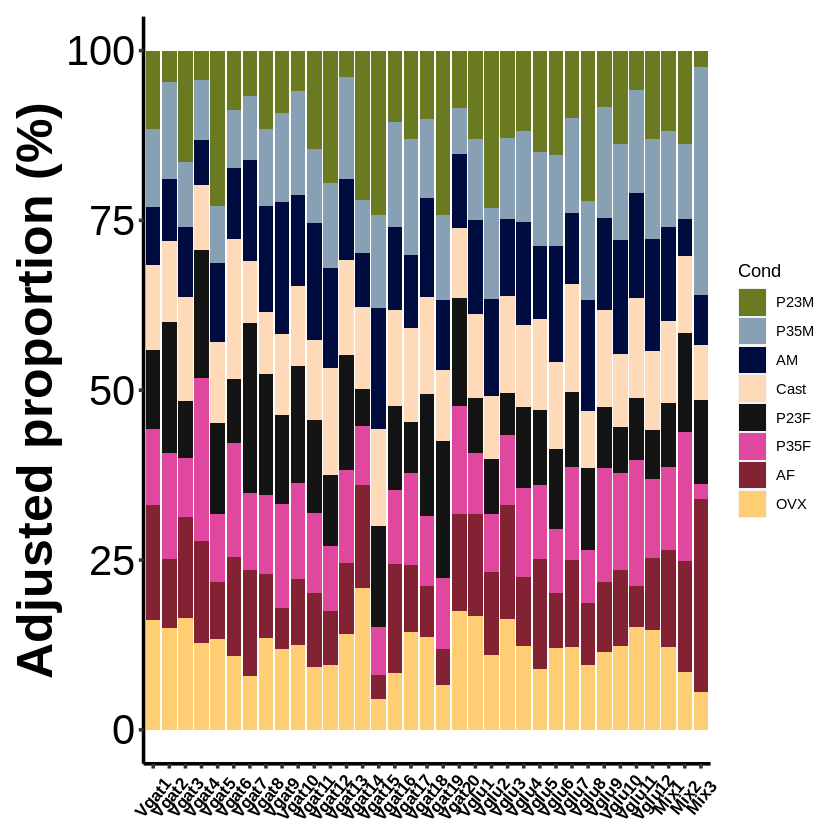

In [163]:
ggplot(Cell_number,aes(x=type,y=proportion,fill=Cond))+geom_bar(stat = "identity")+ylab("Adjusted proportion (%)")+
scale_fill_manual(values=c("#697A21", "#88A0B4", "#000C3F","#FFDAB9", "gray8","#E0479E","#832232","#FFCD73"))+
theme(axis.title.y=element_text(size=30,face="bold"),axis.title.x=element_blank(),axis.text.y=element_text(size=25,color="black"),axis.text.x=element_text(size=10,angle = 50, hjust = 0.5,vjust=0.5,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=1),axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 10, 10, 10))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/proportion on top_adjusted.pdf",height=6, width=10 , paper = "letter")

# UMI

In [19]:
type<-numeric()
for(i in 1:dim(MPOA.integrated@meta.data)[1]){
    type[i]<-new.ident[[MPOA.integrated@meta.data$seurat_clusters[i]]]
}
type<-factor(type,levels=new.ident)
MPOA.integrated@meta.data$type<-type
#need to remove ambiguous1
MPOA.integrated@meta.data<-subset(MPOA.integrated@meta.data,type!="Ambiguous1")
MPOA.integrated@meta.data$type<-factor(MPOA.integrated@meta.data$type,levels=c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20","Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12","Mix1","Mix2","Mix3"))

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


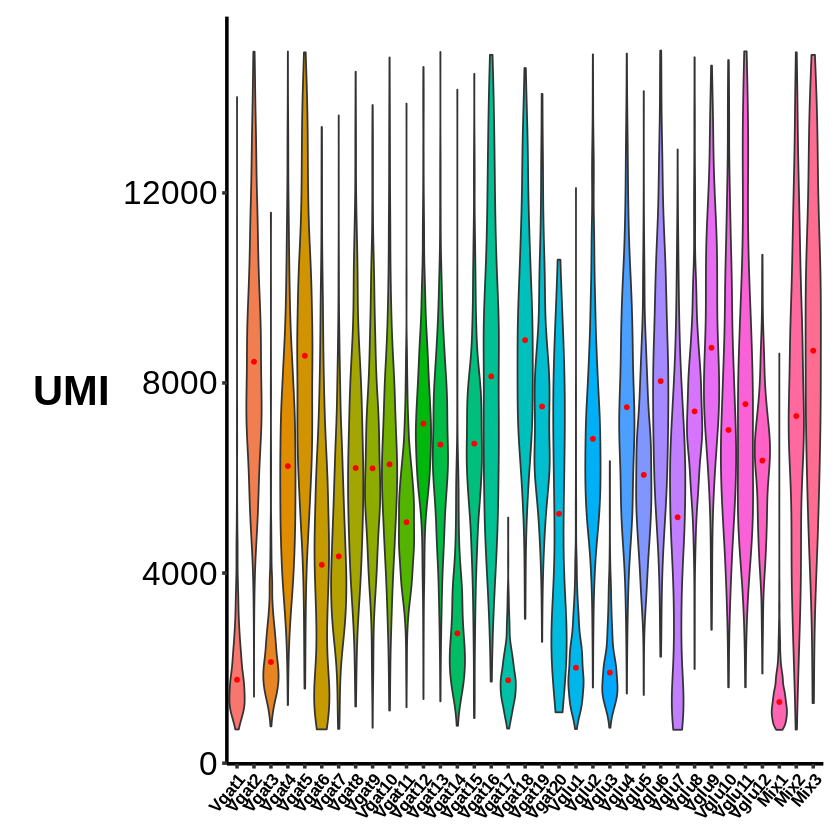

In [8]:
ggplot(MPOA.integrated@meta.data,aes_string(x="type",y="nCount_RNA",fill="type"))+geom_violin(scale = "width")+#scale_fill_manual(values=colors)+
stat_summary(fun.y=median, geom="point", size=1, color="red")+ylab("UMI")+ 
theme(axis.title.x=element_blank(),
,axis.text.y=element_text(size=20,color="black"),axis.title.y=element_text(size=25,angle=0,face="bold",margin = margin(t = 10, r = 8, b = 0, l = 10),vjust=0.5,color="black"),axis.text.x=element_text(size=10,angle=50,vjust=1,face="bold",hjust=1,color="black")
,axis.title=element_text(size=15,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=1),legend.position="none",axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 10, 10, 10))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/UMI_Neurons.pdf",height=3, width=10 , paper = "letter")

Warning message:
“`fun.y` is deprecated. Use `fun` instead.”


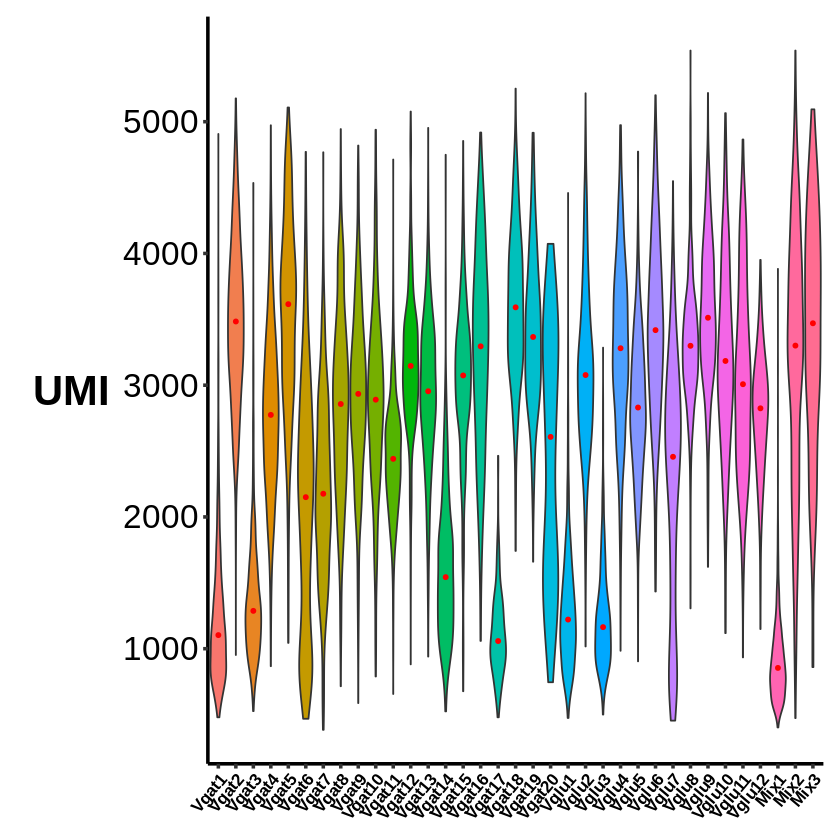

In [9]:
ggplot(MPOA.integrated@meta.data,aes_string(x="type",y="nFeature_RNA",fill="type"))+geom_violin(scale = "width")+#scale_fill_manual(values=colors)+
stat_summary(fun.y=median, geom="point", size=1, color="red")+ylab("UMI")+ 
theme(axis.title.x=element_blank(),
,axis.text.y=element_text(size=20,color="black"),axis.title.y=element_text(size=25,angle=0,face="bold",margin = margin(t = 10, r = 8, b = 0, l = 10),vjust=0.5,color="black"),axis.text.x=element_text(size=10,angle=50,vjust=1,face="bold",hjust=1,color="black")
,axis.title=element_text(size=15,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=1),legend.position="none",axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 10, 10, 10))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/gene_Neurons.pdf",height=3, width=10 , paper = "letter")

# detailed data frame: individual data point per cluster
# Violin for selected genes across cell-types

In [62]:
#supplementary fig1 210711
Cell_type<-rev(c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20","Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12","Mix1","Mix2","Mix3"))
#Cell_type<-factor(Cell_type,levels=Cell_type)
gene_list<-c("Slc32a1","Slc17a6","Esr1","Pgr","Ar","Gal","Nts","Adcyap1","Pdyn","Rxfp1")

In [63]:
#initialize empty data frame
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(Cell_type)){
L<-length(eval(parse(text = paste(Cell_type[i],"_barcode",sep=""))))

Cell_number_t<- data.frame("type" =c(rep(Cell_type[i],L)))
#used normalized uncorrected data
for (p in 1:length(gene_list)){
Cell_number_t[gene_list[p]]<-as.vector(MPOA.integrated@assays$RNA@data[gene_list[p],eval(parse(text = paste(Cell_type[i],"_barcode",sep="")))])
}
Cell_number<-rbind(Cell_number_t,Cell_number)}

as.factor(Cell_number$type)

[1] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
   [11] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
   [21] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
   [31] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
   [41] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
   [51] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
   [61] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
   [71] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
   [81] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
   [91] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [101] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [111] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [121] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [131] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [141] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [151] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [161] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [171] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [181] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [191] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [201] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [211] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [221] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [231] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [241] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [251] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [261] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [271] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [281] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [291] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [301] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [311] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [321] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [331] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [341] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [351] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [361] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [371] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [381] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [391] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [401] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [411] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [421] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [431] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [441] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [451] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [461] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [471] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [481] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [491] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [501] Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1  Vgat1 
  [511] Vgat1  Vgat1  Vgat

In [64]:
library(grid)

In [65]:
library(ggplot2)

In [66]:
colors<-rep("dodgerblue4",35)

In [77]:
#no median used for paper
for (k in 1:length(gene_list))
    {
if (k==length(gene_list)){assign(paste("P",k,sep=""),ggplot(Cell_number,aes_string(x="type",y=gene_list[k],fill="type"))+geom_violin(scale = "width", lwd=0.2)+scale_fill_manual(values=colors)+ylab(gene_list[k])+ theme(axis.title.x=element_blank(),
        ,axis.text.y=element_blank(), axis.ticks.y=element_blank(),axis.text.x=element_text(size=6,face="bold",color="black",angle = 50, hjust =0.5,vjust=0.6,margin = margin(t = 2, r =0, b = 0, l =0)),axis.title.y=element_text(size=6,angle=0,face="bold",vjust=0.5,margin = margin(t = 5, r = 10, b = 0, l = 12)), axis.title=element_text(size=6,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position="none",plot.margin = unit(c(0, 0, 0, 0), "cm")))}
else{
    assign(paste("P",k,sep=""),ggplot(Cell_number,aes_string(x="type",y=gene_list[k],fill="type"))+geom_violin(scale = "width", lwd=0.2)+scale_fill_manual(values=colors)+ylab(gene_list[k])+ theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(), axis.ticks.x=element_blank(),axis.text.y=element_blank(), axis.ticks.y=element_blank(),axis.title.y=element_text(size=6,angle=0,face="bold",vjust=0.5,margin = margin(t = 5, r = 10, b = 0, l = 12)), axis.title=element_text(size=6,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position="none",plot.margin = unit(c(0, 0, 0, 0), "cm")))}

}

In [78]:
#210711 supplementary1
merge<-list()
for (i in length(gene_list):1){   
       if (length(merge)==0){
        merge<-ggplotGrob(eval(parse(text=paste("P",i,sep = ""))))}else{merge<-rbind(ggplotGrob(eval(parse(text=paste("P",i,sep = "")))),merge,size = "last")}}

#all genes
pdf(paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/stackplotviolin_all_clusters_canonicalmarkers_S1",".pdf",sep=""),height=1.2, width=7 , paper = "letter")
grid.newpage()
grid.draw(merge)
dev.off()

png 
  2

# Cell type disc

In [8]:
#210308 Fig1
Cell_type<-rev(c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20"))
Cell_type<-factor(Cell_type,levels=Cell_type)
gene_list<-rev(c("Slc32a1","Slc17a6"))

In [173]:
#supplementary fig2
Cell_type<-rev(c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20","Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12","Mix1","Mix2","Mix3"))
Cell_type<-factor(Cell_type,levels=Cell_type)
gene_list<-c("Ntng1","Zfhx4","Gabra1","Hpcal1","Satb1","Nfix","Six3","Isl1","Zic1","C1ql3","Arhgap6","Zeb2","Th","Sema3c","Lhx8","Nts","Penk","Foxp2","Pou3f1","Nr4a2","Trh","Gng8","Cacna2d1","Eomes","Lhx9","Nrn1","Gda","Nxph4","Pde4b","Adcyap1","Otp","Neurod1","Acp1","Slc1a3","Mal")

In [6]:
#Fig1 201227 male
Cell_type<-rev(c("Vgat2","Vgat4","Vgat6","Vgat16","Vgat13","Vgat8","Vgat1","Vgat10","Vgat18","Vgat7","Vgat3","Vgat9","Vgat17","Vgat15","Vgat12","Vgat19","Vgat5","Vgat14","Vgat11","Vgat20"))
Cell_type<-factor(Cell_type,levels=Cell_type)
gene_list<-rev(c("Esr1","Lamp5"))
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
MPOA.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AM")))
#identifying cluster barcodes in each condition
# exp. Oligo_1_barcode_ctrl gives all barcodes in it
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}

In [9]:
#Fig1 201227 female
Cell_type<-rev(c("Vgat2","Vgat4","Vgat6","Vgat16","Vgat13","Vgat8","Vgat1","Vgat10","Vgat18","Vgat7","Vgat3","Vgat9","Vgat17","Vgat15","Vgat12","Vgat19","Vgat5","Vgat14","Vgat11","Vgat20"))
Cell_type<-factor(Cell_type,levels=Cell_type)
gene_list<-rev(c("Esr1","Apoc3"))
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
MPOA.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AF")))
#identifying cluster barcodes in each condition
# exp. Oligo_1_barcode_ctrl gives all barcodes in it
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}

In [7]:
#supplementary fig2, updated 210711
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
#MPOA.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AM" | stim=="AF")))
#identifying cluster barcodes in each condition
# exp. Oligo_1_barcode_ctrl gives all barcodes in it
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}

In [11]:
Cell_type<-rev(c("Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12"))
Cell_type<-factor(Cell_type,levels=Cell_type)
gene_list<-rev(c("Slc32a1","Slc17a6","Esr1","Ar"))

In [6]:
#Ext Fig3 201125 male
Cell_type<-rev(c("Vgat18","Vgat8","Vgat13","Vgat10","Vgat1","Vgat4","Vgat6","Vgat2","Vgat16","Vgat15","Vgat12","Vgat17","Vgat19","Vgat5","Vgat14","Vgat3","Vgat20","Vgat7","Vgat11","Vgat9"))
Cell_type<-factor(Cell_type,levels=Cell_type)
gene_list<-rev(c("Slc32a1","Slc17a6","Esr1","Ar"))
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
MPOA.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AM")))
#identifying cluster barcodes in each condition
# exp. Oligo_1_barcode_ctrl gives all barcodes in it
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}

In [18]:
#Ext Fig3 201125 female
Cell_type<-rev(c("Vgat18","Vgat8","Vgat13","Vgat10","Vgat1","Vgat4","Vgat6","Vgat2","Vgat16","Vgat15","Vgat12","Vgat17","Vgat19","Vgat5","Vgat14","Vgat3","Vgat20","Vgat7","Vgat11","Vgat9"))
Cell_type<-factor(Cell_type,levels=Cell_type)
gene_list<-rev(c("Slc32a1","Slc17a6","Esr1","Ar"))
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
MPOA.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AF")))
#identifying cluster barcodes in each condition
# exp. Oligo_1_barcode_ctrl gives all barcodes in it
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}

In [15]:
#Ext Fig7 201128 male
Cell_type<-rev(c("Vgat6","Vgat2","Vgat16","Vgat4","Vgat10","Vgat13","Vgat8","Vgat17","Vgat1","Vgat3","Vgat14","Vgat5","Vgat7","Vgat11","Vgat9","Vgat19","Vgat15","Vgat18","Vgat12"))
Cell_type<-factor(Cell_type,levels=Cell_type)
gene_list<-rev(c("Slc32a1","Slc17a6","Ar","Esr1"))
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
MPOA.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AM")))
#identifying cluster barcodes in each condition
# exp. Oligo_1_barcode_ctrl gives all barcodes in it
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}

In [18]:
#Ext Fig7 201125 female
Cell_type<-rev(c("Vgat13","Vgat16","Vgat4","Vgat10","Vgat8","Vgat2","Vgat15","Vgat18","Vgat12","Vgat7","Vgat11","Vgat9","Vgat14","Vgat5","Vgat19"))
Cell_type<-factor(Cell_type,levels=Cell_type)
gene_list<-rev(c("Slc32a1","Slc17a6","Esr1","Ar"))
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)
MPOA.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AF")))
#identifying cluster barcodes in each condition
# exp. Oligo_1_barcode_ctrl gives all barcodes in it
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
}

In [29]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_t<- data.frame("cluster" =Cell_type, "gene"=c(rep(gene_list[i],L)))
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
Cell_number_t$pct[p]<-100*sum(MPOA.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
Cell_number_t$avg[p]<-(mean(MPOA.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])-mean(MPOA.integrated@assays$RNA@data[gene_list[i],]))/sd(MPOA.integrated@assays$RNA@data[gene_list[i],])
#for avg only consider the expressed cell
 #t<-LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0
# Cell_number_t$avg[p]<-mean(LHb.integrated@assays$RNA@data[gene_list[i],t])/sd(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])    
    }
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

[1] Mix3   Mix2   Mix1   Vglu12 Vglu11 Vglu10 Vglu9  Vglu8  Vglu7  Vglu6 
 [11] Vglu5  Vglu4  Vglu3  Vglu2  Vglu1  Vgat20 Vgat19 Vgat18 Vgat17 Vgat16
 [21] Vgat15 Vgat14 Vgat13 Vgat12 Vgat11 Vgat10 Vgat9  Vgat8  Vgat7  Vgat6 
 [31] Vgat5  Vgat4  Vgat3  Vgat2  Vgat1  Mix3   Mix2   Mix1   Vglu12 Vglu11
 [41] Vglu10 Vglu9  Vglu8  Vglu7  Vglu6  Vglu5  Vglu4  Vglu3  Vglu2  Vglu1 
 [51] Vgat20 Vgat19 Vgat18 Vgat17 Vgat16 Vgat15 Vgat14 Vgat13 Vgat12 Vgat11
 [61] Vgat10 Vgat9  Vgat8  Vgat7  Vgat6  Vgat5  Vgat4  Vgat3  Vgat2  Vgat1 
 [71] Mix3   Mix2   Mix1   Vglu12 Vglu11 Vglu10 Vglu9  Vglu8  Vglu7  Vglu6 
 [81] Vglu5  Vglu4  Vglu3  Vglu2  Vglu1  Vgat20 Vgat19 Vgat18 Vgat17 Vgat16
 [91] Vgat15 Vgat14 Vgat13 Vgat12 Vgat11 Vgat10 Vgat9  Vgat8  Vgat7  Vgat6 
[101] Vgat5  Vgat4  Vgat3  Vgat2  Vgat1  Mix3   Mix2   Mix1   Vglu12 Vglu11
[111] Vglu10 Vglu9  Vglu8  Vglu7  Vglu6  Vglu5  Vglu4  Vglu3  Vglu2  Vglu1 
[121] Vgat20 Vgat19 Vgat18 Vgat17 Vgat16 Vgat15 Vgat14 Vgat13 Vgat12 Vgat11
[131] Vgat10 Vgat9  Vgat8  Vgat7  Vgat6  Vgat5  Vgat4  Vgat3  Vgat2  Vgat1 
[141] Mix3   Mix2   Mix1   Vglu12 Vglu11 Vglu10 Vglu9  Vglu8  Vglu7  Vglu6 
[151] Vglu5  Vglu4  Vglu3  Vglu2  Vglu1  Vgat20 Vgat19 Vgat18 Vgat17 Vgat16
[161] Vgat15 Vgat14 Vgat13 Vgat12 Vgat11 Vgat10 Vgat9  Vgat8  Vgat7  Vgat6 
[171] Vgat5  Vgat4  Vgat3  Vgat2  Vgat1  Mix3   Mix2   Mix1   Vglu12 Vglu11
[181] Vglu10 Vglu9  Vglu8  Vglu7  Vglu6  Vglu5  Vglu4  Vglu3  Vglu2  Vglu1 
[191] Vgat20 Vgat19 Vgat18 Vgat17 Vgat16 Vgat15 Vgat14 Vgat13 Vgat12 Vgat11
[201] Vgat10 Vgat9  Vgat8  Vgat7  Vgat6  Vgat5  Vgat4  Vgat3  Vgat2  Vgat1 
[211] Mix3   Mix2   Mix1   Vglu12 Vglu11 Vglu10 Vglu9  Vglu8  Vglu7  Vglu6 
[221] Vglu5  Vglu4  Vglu3  Vglu2  Vglu1  Vgat20 Vgat19 Vgat18 Vgat17 Vgat16
[231] Vgat15 Vgat14 Vgat13 Vgat12 Vgat11 Vgat10 Vgat9  Vgat8  Vgat7  Vgat6 
[241] Vgat5  Vgat4  Vgat3  Vgat2  Vgat1  Mix3   Mix2   Mix1   Vglu12 Vglu11
[251] Vglu10 Vglu9  Vglu8  Vglu7  Vglu6  Vglu5  Vglu4  Vglu3  Vglu2  Vglu1 
[261] Vgat20 Vgat19 Vgat18 Vgat17 Vgat16 Vgat15 Vgat14 Vgat13 Vgat12 Vgat11
[271] Vgat10 Vgat9  Vgat8  Vgat7  Vgat6  Vgat5  Vgat4  Vgat3  Vgat2  Vgat1 
[281] Mix3   Mix2   Mix1   Vglu12 Vglu11 Vglu10 Vglu9  Vglu8  Vglu7  Vglu6 
[291] Vglu5  Vglu4  Vglu3  Vglu2  Vglu1  Vgat20 Vgat19 Vgat18 Vgat17 Vgat16
[301] Vgat15 Vgat14 Vgat13 Vgat12 Vgat11 Vgat10 Vgat9  Vgat8  Vgat7  Vgat6 
[311] Vgat5  Vgat4  Vgat3  Vgat2  Vgat1  Mix3   Mix2   Mix1   Vglu12 Vglu11
[321] Vglu10 Vglu9  Vglu8  Vglu7  Vglu6  Vglu5  Vglu4  Vglu3  Vglu2  Vglu1 
[331] Vgat20 Vgat19 Vgat18 Vgat17 Vgat16 Vgat15 Vgat14 Vgat13 Vgat12 Vgat11
[341] Vgat10 Vgat9  Vgat8  Vgat7  Vgat6  Vgat5  Vgat4  Vgat3  Vgat2  Vgat1 
[351] Mix3   Mix2   Mix1   Vglu12 Vglu11 Vglu10 Vglu9  Vglu8  Vglu7  Vglu6 
[361] Vglu5  Vglu4  Vglu3  Vglu2  Vglu1  Vgat20 Vgat19 Vgat18 Vgat17 Vgat16
[371] Vgat15 Vgat14 Vgat13 Vgat12 Vgat11 Vgat10 Vgat9  Vgat8  Vgat7  Vgat6 
[381] Vgat5  Vgat4  Vgat3  Vgat2  Vgat1 
35 Levels: Mix3 Mix2 Mix1 Vglu12 Vglu11 Vglu10 Vglu9 Vglu8 Vglu7 ... Vgat1

In [177]:
saveRDS(Cell_number,"/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/marker_disc_markger_genes_usingallgroups.rds")

In [8]:
Cell_number<-readRDS("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/marker_disc_markger_genes.rds")

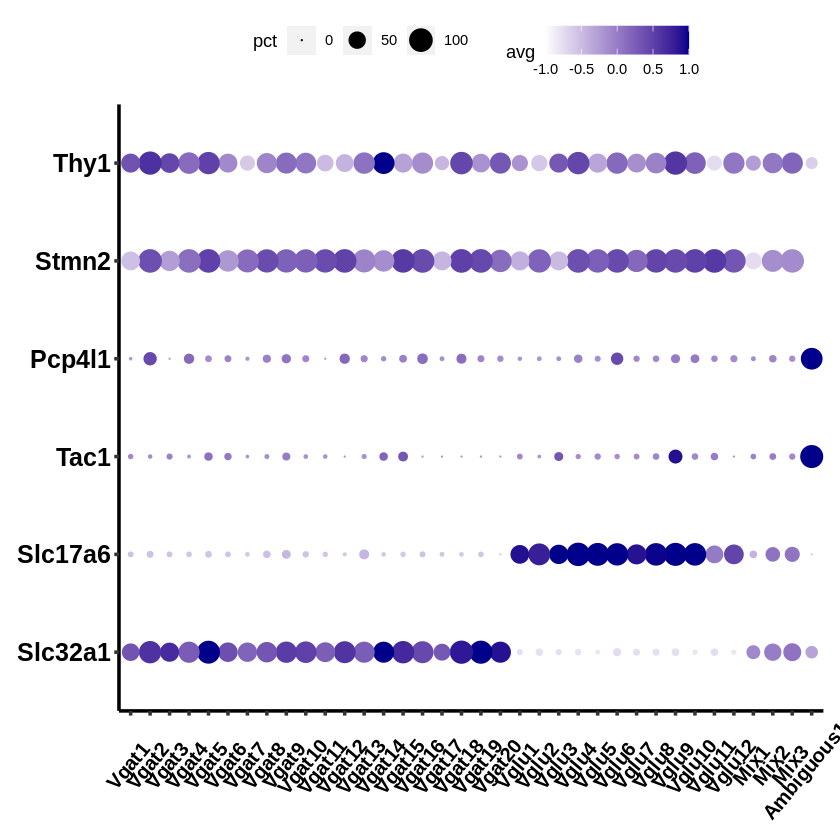

In [122]:
#justification to remove ambiguous 1
ggplot(Cell_number, aes(cluster, gene)) + geom_point(aes(size = pct, colour=avg)) + 
scale_x_discrete(limits = rev(levels(Cell_number$cluster)))+scale_y_discrete(limits =(levels(Cell_number$gene)))+
scale_color_gradient(low = "white", high = "darkblue",limits = c(-1,1.0),breaks=seq(-1,1.0,0.5),oob=squish) + scale_size_continuous(range = c(0,6),limits=c(0,100),breaks=seq(0,100,50))+
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+
theme(axis.title=element_blank(),axis.text.y=element_text(size=15,color="black",face="bold"),axis.text.x=element_text(size=12,angle = 50, hjust = 0.6,vjust=0.6,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=1),legend.position ="top",axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 10, 10, 10))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/Vglu_Vgat_distribution_disc.pdf",height=4, width=7.5 , paper = "letter")

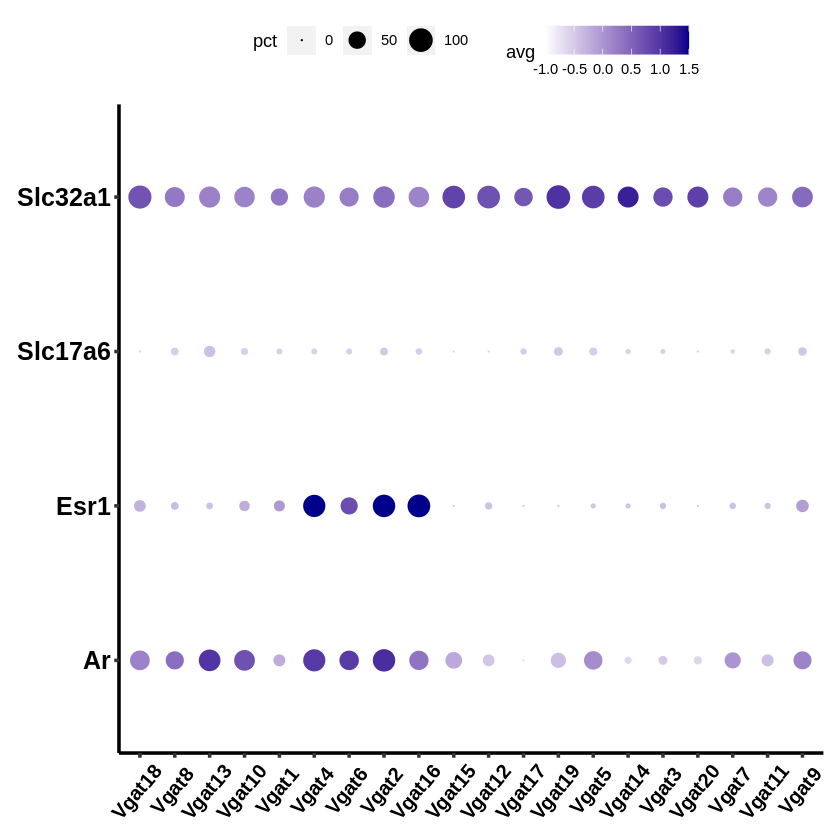

In [20]:
#ext fig3
ggplot(Cell_number, aes(cluster, gene)) + geom_point(aes(size = pct, colour=avg)) + 
scale_x_discrete(limits = rev(levels(Cell_number$cluster)))+scale_y_discrete(limits =rev(levels(Cell_number$gene)))+
scale_color_gradient(low = "white", high = "darkblue",limits = c(-1,1.5),breaks=seq(-1,1.5,0.5),oob=squish) + scale_size_continuous(range = c(0,6),limits=c(0,100),breaks=seq(0,100,50))+
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+
theme(axis.title=element_blank(),axis.text.y=element_text(size=15,color="black",face="bold"),axis.text.x=element_text(size=12,angle = 50, hjust = 0.6,vjust=0.6,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=1),legend.position ="top",axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 10, 10, 10))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/marker_disc_VgatVgluesr1_Ar_AF_genes_avg.pdf",height=2.6, width=6 , paper = "letter")

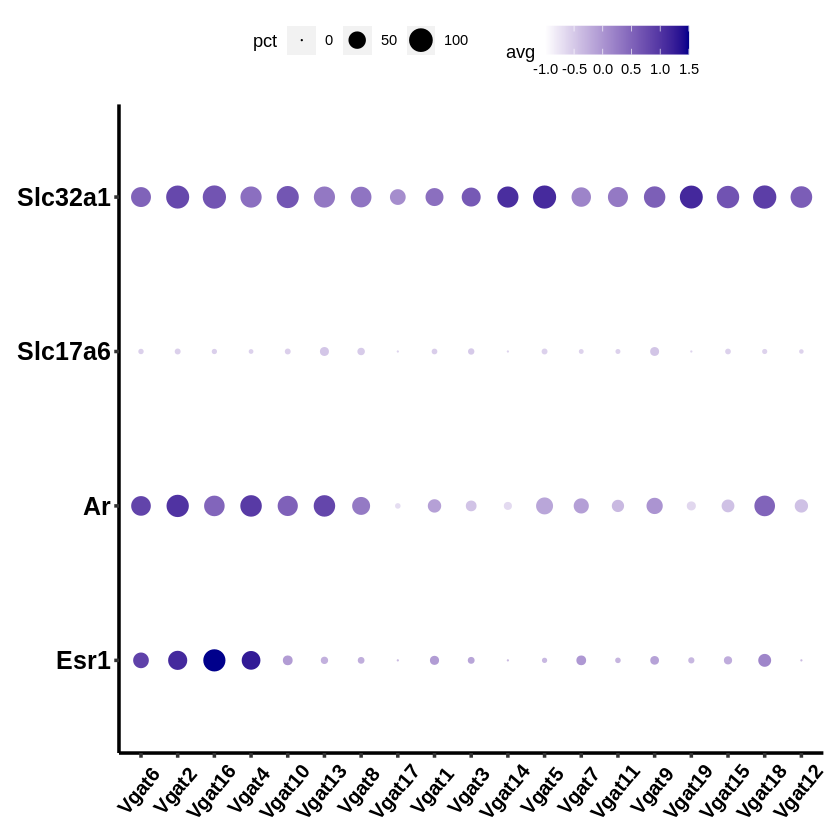

In [17]:
#ext fig7 male
ggplot(Cell_number, aes(cluster, gene)) + geom_point(aes(size = pct, colour=avg)) + 
scale_x_discrete(limits = rev(levels(Cell_number$cluster)))+scale_y_discrete(limits =rev(levels(Cell_number$gene)))+
scale_color_gradient(low = "white", high = "darkblue",limits = c(-1,1.5),breaks=seq(-1,1.5,0.5),oob=squish) + scale_size_continuous(range = c(0,6),limits=c(0,100),breaks=seq(0,100,50))+
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+
theme(axis.title=element_blank(),axis.text.y=element_text(size=15,color="black",face="bold"),axis.text.x=element_text(size=12,angle = 50, hjust = 0.6,vjust=0.6,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=1),legend.position ="top",axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 10, 10, 10))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/marker_disc_VgatVgluesr1_Ar_AM_genes_avgFor_exxtfig7.pdf",height=2.6, width=6 , paper = "letter")

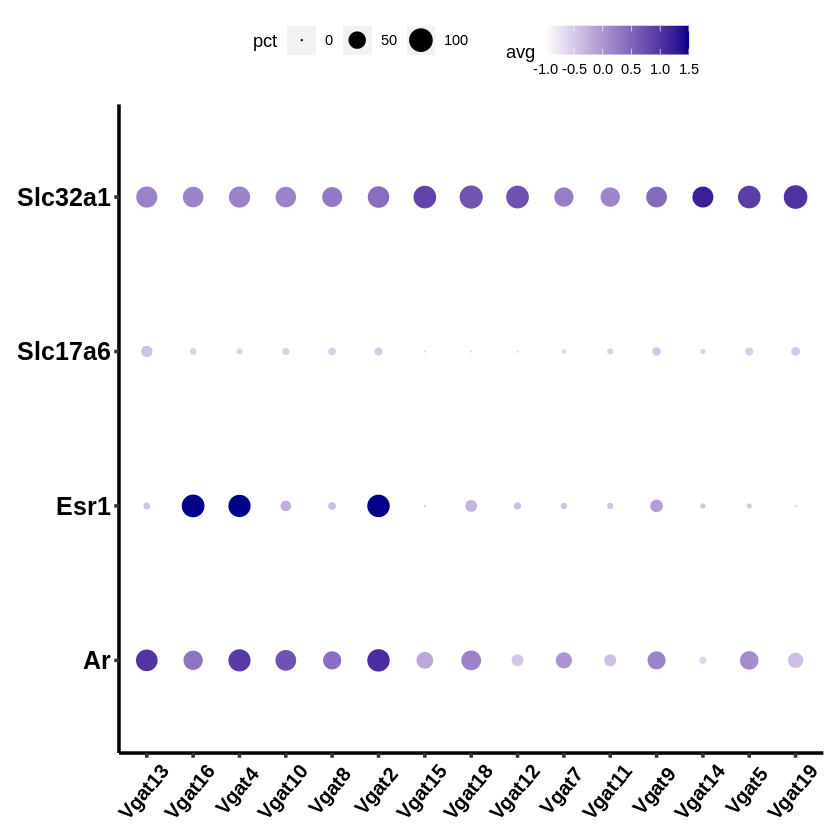

In [23]:
#ext fig7 female
ggplot(Cell_number, aes(cluster, gene)) + geom_point(aes(size = pct, colour=avg)) + 
scale_x_discrete(limits = rev(levels(Cell_number$cluster)))+scale_y_discrete(limits =rev(levels(Cell_number$gene)))+
scale_color_gradient(low = "white", high = "darkblue",limits = c(-1,1.5),breaks=seq(-1,1.5,0.5),oob=squish) + scale_size_continuous(range = c(0,6),limits=c(0,100),breaks=seq(0,100,50))+
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+
theme(axis.title=element_blank(),axis.text.y=element_text(size=15,color="black",face="bold"),axis.text.x=element_text(size=12,angle = 50, hjust = 0.6,vjust=0.6,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=1),legend.position ="top",axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 10, 10, 10))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/marker_disc_VgatVgluesr1_Ar_AF_genes_avgFor_exxtfig7.pdf",height=2.6, width=5.3 , paper = "letter")

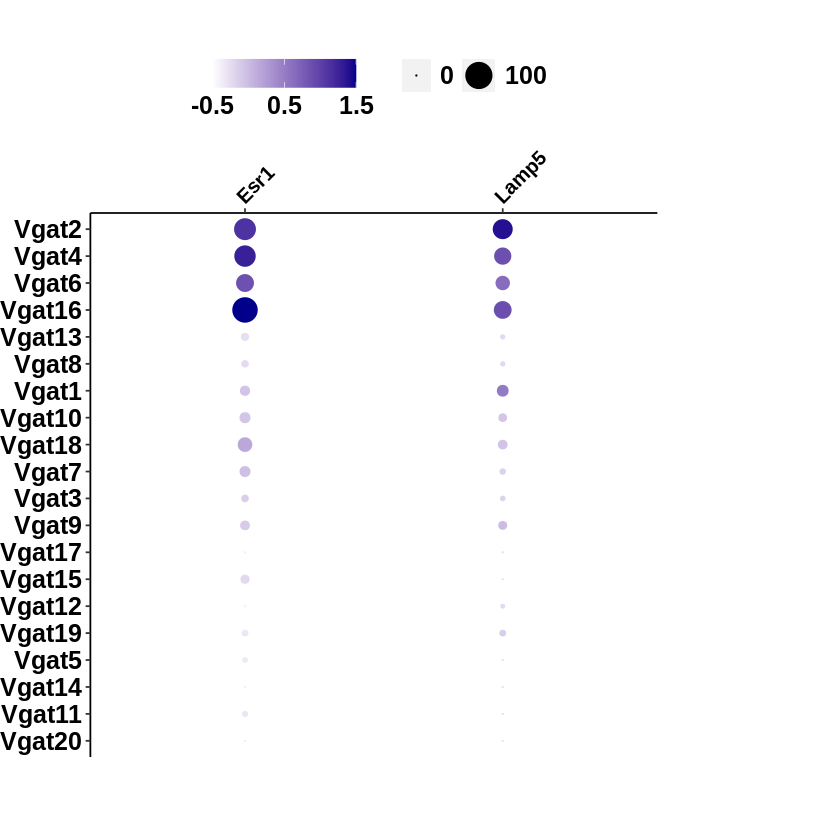

In [8]:
#201227
ggplot(Cell_number, aes( gene,cluster)) + geom_point(aes(size = pct, colour=avg)) + 
scale_y_discrete(limits = (levels(Cell_number$cluster)))+scale_x_discrete(limits =(levels(Cell_number$gene)),position = "top")+
scale_color_gradient(low = "white", high = "darkblue",limits = c(-0.5,1.5),breaks=seq(-0.5,1.5,1),oob=squish) + scale_size_continuous(range = c(0,7),limits=c(0,100),breaks=seq(0,100,100))+
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+
theme(axis.title=element_blank(),axis.text.y=element_text(size=15,color="black",face="bold"),axis.text.x=element_text(size=12,vjust=-2,angle =45, hjust = 0,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),legend.position="top",legend.title=element_blank(), legend.text=element_text(size = 15,face="bold"),
        plot.margin = margin(30, 110, 50, 0),, axis.line = element_line(colour = "black",size=0.5),axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 0.5))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/male/marker_disc_lamp5,esr1_AM_genes_avg90.pdf",height=7, width=3 , paper = "letter")

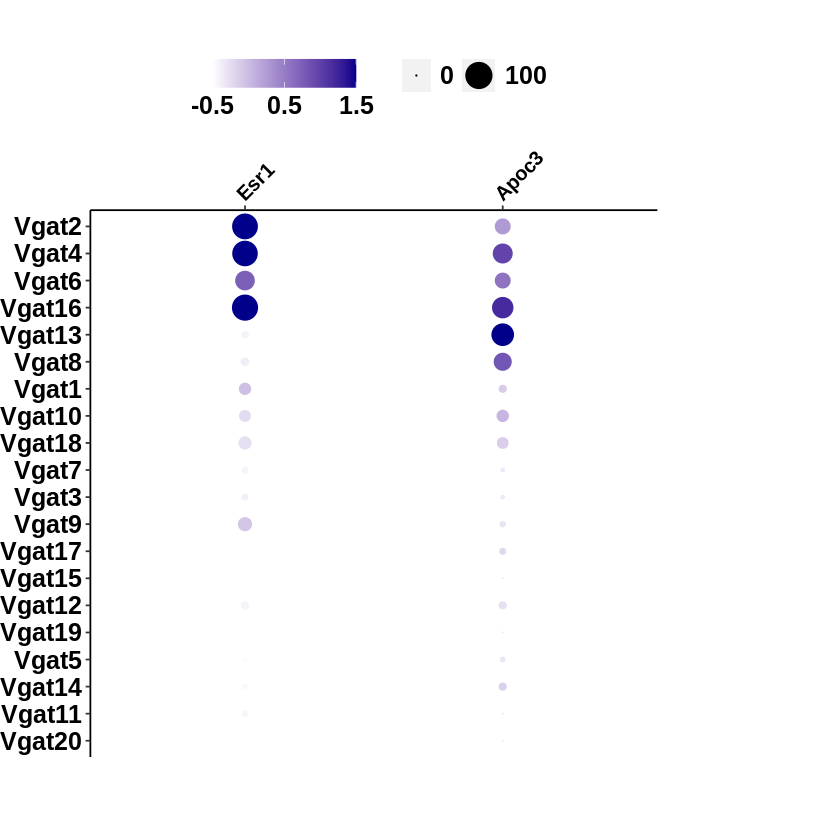

In [11]:
#201227
ggplot(Cell_number, aes( gene,cluster)) + geom_point(aes(size = pct, colour=avg)) + 
scale_y_discrete(limits = (levels(Cell_number$cluster)))+scale_x_discrete(limits =(levels(Cell_number$gene)),position = "top")+
scale_color_gradient(low = "white", high = "darkblue",limits = c(-0.5,1.5),breaks=seq(-0.5,1.5,1),oob=squish) + scale_size_continuous(range = c(0,7),limits=c(0,100),breaks=seq(0,100,100))+
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+
theme(axis.title=element_blank(),axis.text.y=element_text(size=15,color="black",face="bold"),axis.text.x=element_text(size=12,vjust=-2,angle =45, hjust = 0,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),legend.position="top",legend.title=element_blank(), legend.text=element_text(size = 15,face="bold"),
        plot.margin = margin(30, 110, 50, 0),, axis.line = element_line(colour = "black",size=0.5),axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 0.5))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MERFISH/1.0/female/marker_disc_esr1_Apoc3_AF_genes_avg90_custom_threshold.pdf",height=7, width=3 , paper = "letter")

Saving 6.67 x 2.2 in image



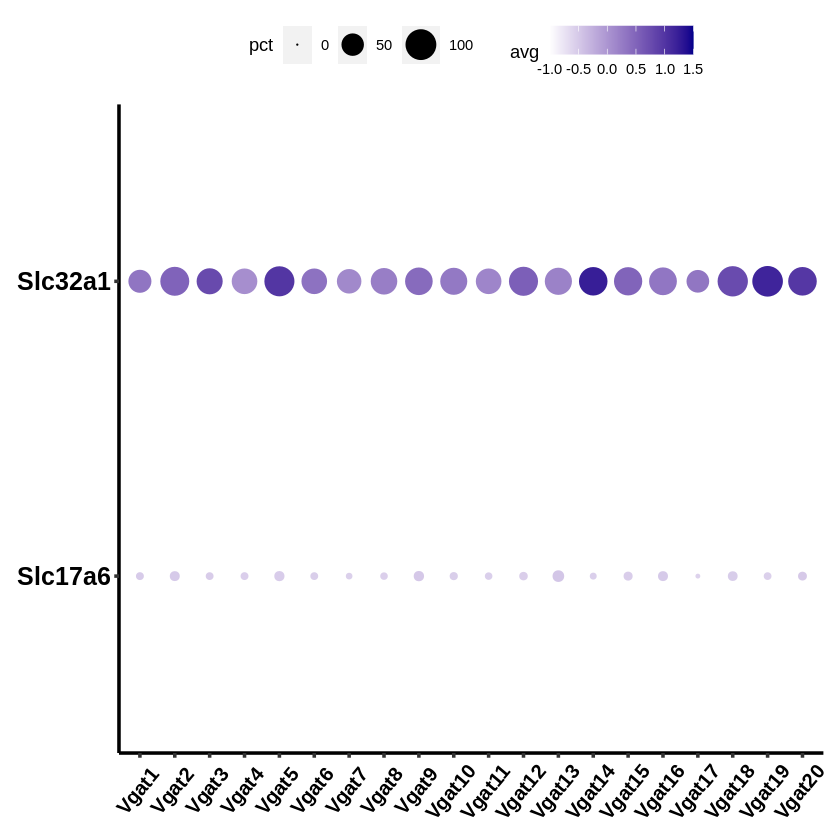

In [20]:
#210308 Fig1 Vgat Vglu in Vgat cells
ggplot(Cell_number, aes(cluster, gene)) + geom_point(aes(size = pct, colour=avg)) + 
scale_x_discrete(limits = rev(levels(Cell_number$cluster)))+scale_y_discrete(limits =rev(levels(Cell_number$gene)))+
scale_color_gradient(low = "white", high = "darkblue",limits = c(-1,1.5),breaks=seq(-1,1.5,0.5),oob=squish) + scale_size_continuous(range = c(0,8),limits=c(0,100),breaks=seq(0,100,50))+
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+
theme(axis.title=element_blank(),axis.text.y=element_text(size=15,color="black",face="bold"),axis.text.x=element_text(size=12,angle = 50, hjust = 0.6,vjust=0.6,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=1),legend.position ="top",axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 10, 10, 10))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/marker_disc_Vgat_Vglu_genes_Fig1.pdf",height=2.2, width= , paper = "letter")

# celltype disc split only for marker

In [10]:
Cell_type<-c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20","Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12","Mix1","Mix2","Mix3")
group<-c("other","P23M","P35M","AM","Cast","P23F","P35F","AF","OVX")
gene_list<-c("Ntng1","Zfhx4","Gabra1","Hpcal1","Satb1","Nfix","Six3","Isl1","Zic1","C1ql3","Arhgap6","Zeb2","Th","Sema3c","Lhx8","Nts","Penk","Foxp2","Pou3f1","Nr4a2","Trh","Gng8","Cacna2d1","Eomes","Lhx9","Nrn1","Gda","Nxph4","Pde4b","Adcyap1","Otp","Neurod1","Acp1","Slc1a3","Mal")

In [22]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(group)){
L<-length(Cell_type)
Cell_number_t<- data.frame("cluster" =Cell_type,"marker"=gene_list, "group"=c(rep(group[i],L)))

for (p in 1:length(Cell_type)){
if(group[i]=="other"){
   temp<-rownames(MPOA.integrated@meta.data)
   barcode<-temp[!(temp %in% eval(parse(text = paste(Cell_type[i],"_barcode",sep=""))))]
Cell_number_t$pct[p]<-100*sum(MPOA.integrated@assays$RNA@data[gene_list[p],barcode]>0)/length(barcode)
Cell_number_t$avg[p]<-(mean(MPOA.integrated@assays$RNA@data[gene_list[p],barcode])-mean(MPOA.integrated@assays$RNA@data[gene_list[p],]))/sd(MPOA.integrated@assays$RNA@data[gene_list[p],])
 }else{
Cell_number_t$pct[p]<-100*sum(MPOA.integrated@assays$RNA@data[gene_list[p],eval(parse(text=paste(Cell_type[p],"_barcode_",group[i],sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode_",group[i],sep=""))))
Cell_number_t$avg[p]<-(mean(MPOA.integrated@assays$RNA@data[gene_list[p],eval(parse(text=paste(Cell_type[p],"_barcode_",group[i],sep="")))])-mean(MPOA.integrated@assays$RNA@data[gene_list[p],]))/sd(MPOA.integrated@assays$RNA@data[gene_list[p],])
    }
}
Cell_number<-rbind(Cell_number_t,Cell_number)
}
#as.factor(Cell_number$cluster)

ERROR: Error in data.frame(cluster = Cell_type, marker = gene_list, group = c(rep(group[i], : arguments imply differing number of rows: 35, 42


In [12]:
Cell_number$cluster<-factor(Cell_number$cluster,levels=c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20","Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12","Mix1","Mix2","Mix3"))

In [13]:
Cell_number$marker<-factor(Cell_number$marker,levels=c("Ntng1","Zfhx4","Gabra1","Hpcal1","Satb1","Nfix","Six3","Isl1","Zic1","C1ql3","Arhgap6","Zeb2","Th","Sema3c","Lhx8","Nts","Penk","Foxp2","Pou3f1","Nr4a2","Trh","Gng8","Cacna2d1","Eomes","Lhx9","Nrn1","Gda","Nxph4","Pde4b","Adcyap1","Otp","Neurod1","Acp1","Slc1a3","Mal"))

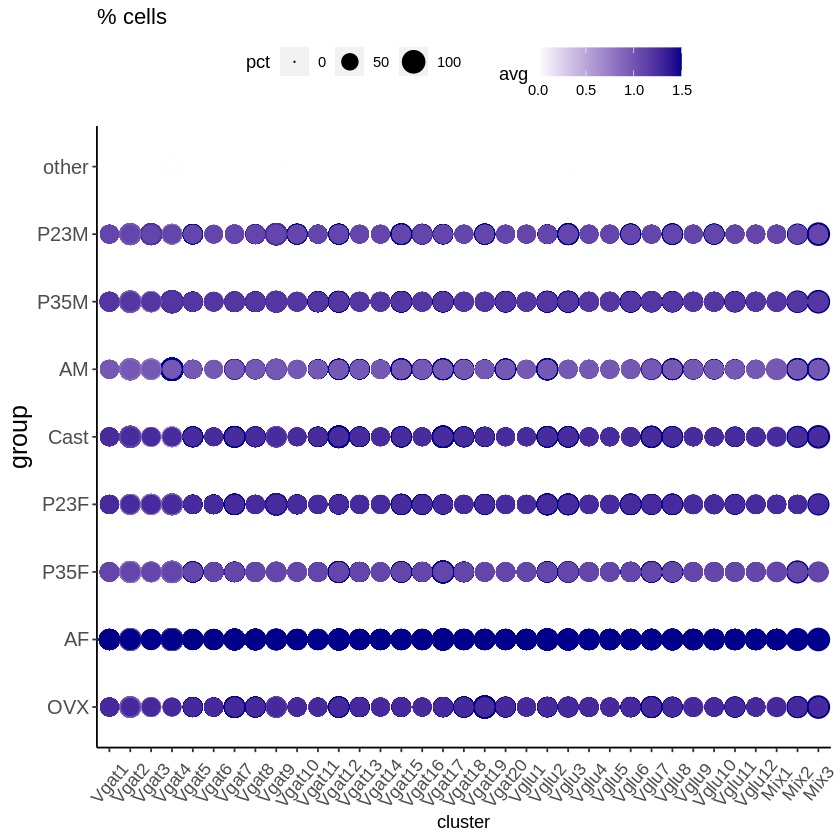

In [22]:
ggplot(Cell_number, aes(cluster, group)) + geom_point(aes(size = pct, colour=avg)) + 
scale_x_discrete(limits = (levels(Cell_number$cluster)))+scale_y_discrete(limits =(levels(Cell_number$group)))+
scale_color_gradient(low = "white", high = "darkblue",limits = c(0,1.5),breaks=seq(0,1.5,0.5),oob=squish) + scale_size_continuous(range = c(0,6),limits=c(0,100),breaks=seq(0,100,50))+
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=11,angle = 50, hjust = 0.5,vjust=0.5),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position ="top")+ggtitle("% cells")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/marker_disc_markger_genes_allgroups.pdf",height=3.5, width=10 , paper = "letter")

In [14]:
saveRDS(Cell_number,"/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/marker_disc_markger_genes_split.rds")

In [7]:
Cell_number<-readRDS("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/marker_disc_markger_genes_split.rds")

In [17]:
Cell_number

cluster marker   group pct       avg         
1   Vgat1   Ntng1    OVX   59.36073  1.2684215   
2   Vgat2   Zfhx4    OVX   80.00000  0.9711031   
3   Vgat3   Gabra1   OVX   67.63006  0.7224031   
4   Vgat4   Hpcal1   OVX   51.72414  0.1966151   
5   Vgat5   Satb1    OVX   68.33333  2.0206450   
6   Vgat6   Nfix     OVX   60.20408  2.2718694   
7   Vgat7   Six3     OVX   81.08108  1.7256885   
8   Vgat8   Isl1     OVX   74.35897  1.5063147   
9   Vgat9   Zic1     OVX   77.65957  1.1143553   
10  Vgat10  C1ql3    OVX   59.18367  1.6791428   
11  Vgat11  Arhgap6  OVX   57.35294  1.6274743   
12  Vgat12  Zeb2     OVX   78.33333  2.0337601   
13  Vgat13  Th       OVX   67.46988  2.6292089   
14  Vgat14  Sema3c   OVX   46.66667  1.6599531   
15  Vgat15  Lhx8     OVX   65.00000  1.9501503   
16  Vgat16  Nts      OVX   37.14286  0.5238673   
17  Vgat17  Penk     OVX   69.64286  2.5476640   
18  Vgat18  Foxp2    OVX   76.92308  2.2301675   
19  Vgat19  Pou3f1   OVX   94.73684  4.2310122   
20  Vgat20  Nr4a2    OVX   72.72727  7.1823293   
21  Vglu1   Trh      OVX   30.92784  1.3821944   
22  Vglu2   Gng8     OVX   70.87379  3.0099929   
23  Vglu3   Cacna2d1 OVX   72.78912  1.3660231   
24  Vglu4   Eomes    OVX   63.39286  2.9523252   
25  Vglu5   Lhx9     OVX   51.31579  1.5703205   
26  Vglu6   Nrn1     OVX   70.10309  1.7502235   
27  Vglu7   Gda      OVX   83.14607  1.4969105   
28  Vglu8   Nxph4    OVX   72.50000  2.2811635   
29  Vglu9   Pde4b    OVX   67.34694  0.9585088   
30  Vglu10  Adcyap1  OVX   62.50000  1.8716445   
⋮   ⋮       ⋮        ⋮     ⋮         ⋮           
286 Vgat6   Nfix     other  9.131394  0.012744181
287 Vgat7   Six3     other 21.244380  0.022308956
288 Vgat8   Isl1     other 17.240648  0.010457124
289 Vgat9   Zic1     other 33.081686  0.026174938
290 Vgat10  C1ql3    other 12.431080 -0.008941334
291 Vgat11  Arhgap6  other 13.058784  0.011321267
292 Vgat12  Zeb2     other  9.411316  0.012447103
293 Vgat13  Th       other  5.670540 -0.017023080
294 Vgat14  Sema3c   other 10.408007  0.010041235
295 Vgat15  Lhx8     other 10.357113  0.015080463
296 Vgat16  Nts      other 13.228433 -0.032385016
297 Vgat17  Penk     other 15.315124 -0.004649168
298 Vgat18  Foxp2    other  8.949020  0.011342784
299 Vgat19  Pou3f1   other  4.372720  0.009102513
300 Vgat20  Nr4a2    other  1.467470  0.004889903
301 Vglu1   Trh      other  8.461277  0.008990835
302 Vglu2   Gng8     other  6.035287  0.010000318
303 Vglu3   Cacna2d1 other 39.859191  0.012405183
304 Vglu4   Eomes    other  4.139452  0.009923258
305 Vglu5   Lhx9     other  8.584273  0.013390420
306 Vglu6   Nrn1     other 11.820341  0.015879104
307 Vglu7   Gda      other 34.773942  0.016578285
308 Vglu8   Nxph4    other  6.722368  0.011231805
309 Vglu9   Pde4b    other 18.890491  0.015012400
310 Vglu10  Adcyap1  other 11.349563  0.006778673
311 Vglu11  Otp      other  3.388752  0.008058049
312 Vglu12  Neurod1  other  2.629570  0.007655478
313 Mix1    Acp1     other 77.538383 -0.023379114
314 Mix2    Slc1a3   other 12.443804  0.009674223
315 Mix3    Mal      other  6.255832  0.005023962

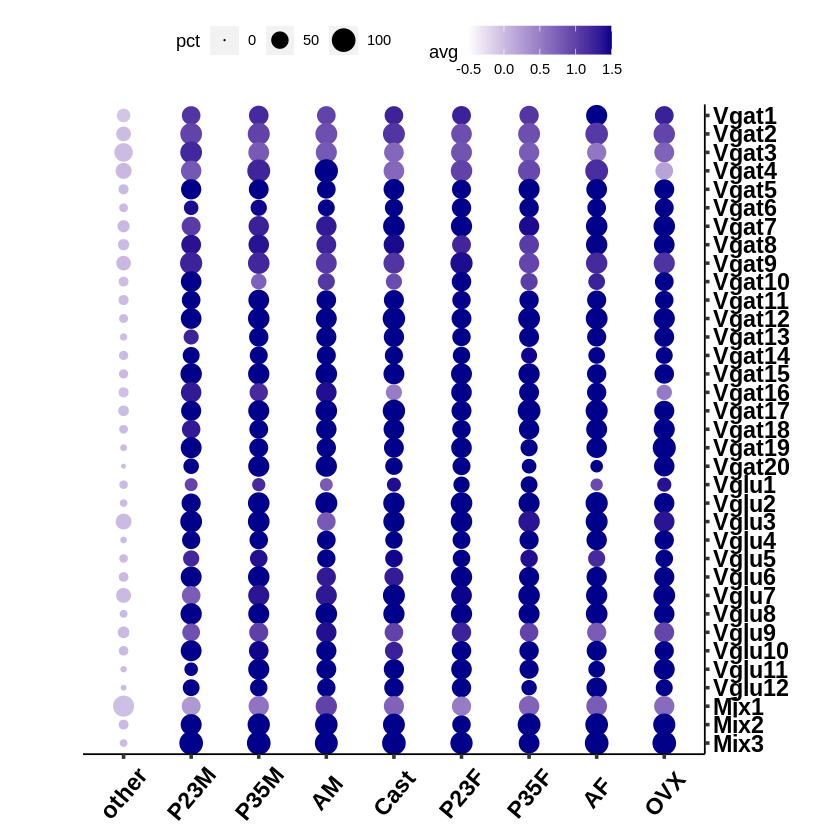

In [20]:
ggplot(Cell_number, aes(group, cluster)) + geom_point(aes(size = pct, colour=avg)) + 
scale_y_discrete(limits = rev(levels(Cell_number$cluster)),position = "right")+scale_x_discrete(limits =rev(levels(Cell_number$group)))+
scale_color_gradient(low = "white", high = "darkblue",limits = c(-0.5,1.5),breaks=seq(-0.5,1.5,0.5),oob=squish) + scale_size_continuous(range = c(0,6),limits=c(0,100),breaks=seq(0,100,50))+
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+
theme(axis.title=element_blank(),axis.text.y=element_text(size=14,color="black",face="bold"),axis.text.x=element_text(size=14,angle = 50, hjust = 0.5,vjust=0.5,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position ="top",axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 30, 10, 50))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/marker_disc_markger_genes_allgroups_xgroup.pdf",height=10, width=3.7 , paper = "letter")

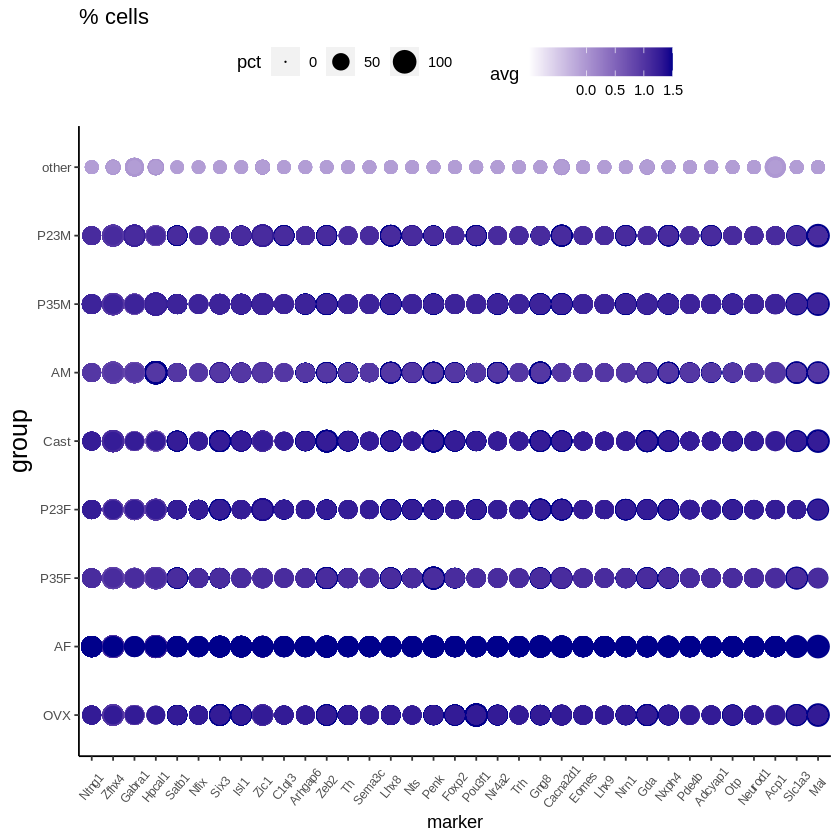

In [118]:
ggplot(Cell_number, aes(marker, group)) + geom_point(aes(size = pct, colour=avg)) + 
scale_x_discrete(limits = (levels(Cell_number$marker)))+scale_y_discrete(limits =(levels(Cell_number$group)))+
scale_color_gradient(low = "white", high = "darkblue",limits = c(-1,1.5),breaks=seq(0,1.5,0.5),oob=squish) + scale_size_continuous(range = c(0,6),limits=c(0,100),breaks=seq(0,100,50))+
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=8),axis.text.x=element_text(size=7,angle = 50, hjust = 0.5,vjust=0.5),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position ="top")+ggtitle("% cells")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/marker_disc_markger_genes_allgroups_gene.pdf",height=3.5, width=10 , paper = "letter")

# correlation between conditions

In [ ]:
combined all

In [164]:
group<-c("AM","P35M","P23M","Cast","AF","P35F","P23F","OVX")
Celltype<-rev(c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20","Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12","Mix1","Mix2","Mix3"))

In [165]:
Final<-data.frame(celltype=Celltype)
for(i in 1:(length(group)-1)){
G1<-group[i]
    temp<-((i+1):length(group))
for(k in temp){
G2<-group[k]
C1<-Celltype
C2<-Celltype
corr<- data.frame(matrix(NA, ncol=length(C1),nrow=length(C2)))
rownames(corr)<-factor(C2,levels=C2)
colnames(corr)<-factor(C1,levels=C1)
C1_exp<-MPOA.integrated@assays$integrated@data[,rownames(subset(MPOA.integrated@meta.data,stim==G1))]
C2_exp<-MPOA.integrated@assays$integrated@data[,rownames(subset(MPOA.integrated@meta.data,stim==G2))]
C1_exp<-C1_exp[rowSums(as.matrix(C1_exp))>0,]
C2_exp<-C2_exp[rowSums(as.matrix(C2_exp))>0,]
common_genes<-intersect(rownames(C1_exp),rownames(C2_exp))
C1_exp<-C1_exp[common_genes,]
C2_exp<-C2_exp[common_genes,]
C1_exp<-t(scale(t(as.matrix(C1_exp))))
C2_exp<-t(scale(t(as.matrix(C2_exp))))
for (i in 1:length(C1)){
    for (j in 1:length(C2)){
    corr[j,i]<-cor(rowMeans(as.matrix(C1_exp[,eval(parse(text = paste(C1[i],"_barcode_",G1,sep="")))])),rowMeans(as.matrix(C2_exp[,eval(parse(text = paste(C2[j],"_barcode_",G2,sep="")))])))
}}

test.m <- melt(as.matrix(corr))

same<-numeric()
different<-numeric()
for (l in 1:dim(test.m)[1]){
if(test.m$Var1[l]==test.m$Var2[l]){same<-c(same,l)
                            different<-different}else{
    same<-same
    different<-c(different,l)}}
Corr<-test.m[same,]
value_different<-numeric()
for (m in 1:length(Celltype)){
    value_different[m]<-mean(subset(test.m[different,],Var2==Celltype[m])$value)
}
Final[,paste("Cis_",G1,G2,sep="")]<-Corr$value
Final[,paste("Trans_",G1,G2,sep="")]<-value_different
    }}
Final<-Final[,2:dim(Final)[2]]
rownames(Final)<-factor(Celltype,levels=Celltype)
test.m <- melt(as.matrix(Final))

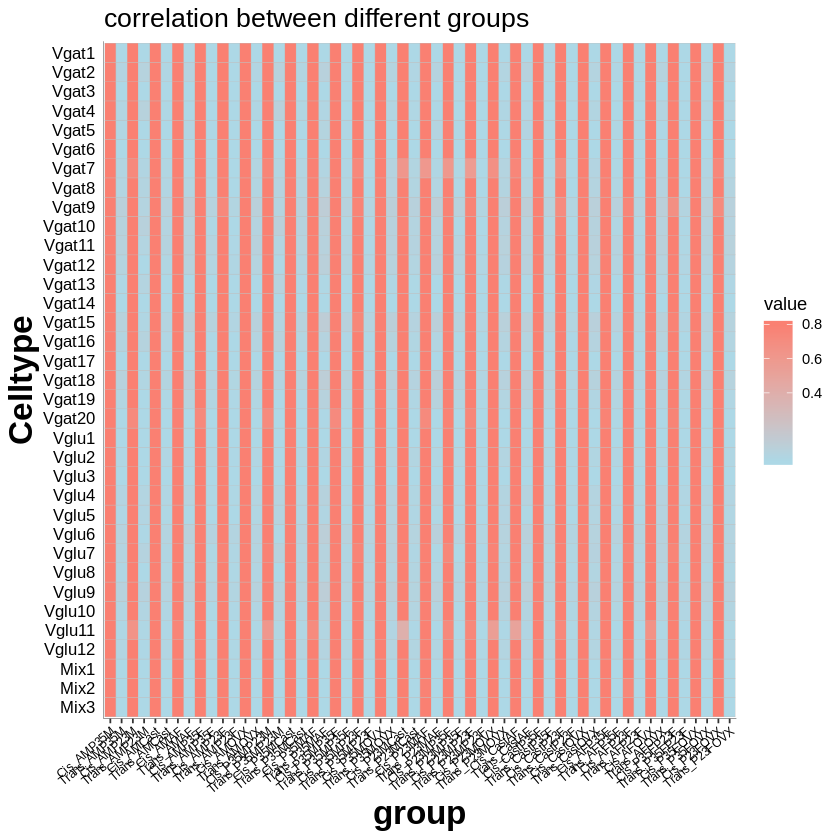

In [169]:
p <-  ggplot(test.m, aes(Var2,Var1, fill= value)) + 
  geom_tile(color = "gray")+ scale_fill_continuous(limits=c(-0, 0.8), breaks=seq(0.4,1,by=0.2),low = "lightblue"
                                                   ,high = "salmon", oob=squish)
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+ylab("Celltype")+xlab("group")+theme(axis.text.y=element_text(size=10,
                                                                    colour = "black"),axis.text.x=element_text(size=7,angle = 40, hjust =1,colour = "black"),axis.title=element_text(size=20,face="bold"),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black", size = 0.1),axis.ticks.y = element_blank())+ggtitle("correlation between different groups")
print(pp)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/celltype simillarity_2_blue.pdf"
,width=12,height=10)

In [114]:
group<-rev(c("AM","P35M","P23M","Cast","AF","P35F","P23F","OVX"))
Celltype<-c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20","Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12","Mix1","Mix2","Mix3")

In [115]:
Final<-data.frame(celltype=Celltype)
for(i in 1:(length(group)-1)){
G1<-group[i]
    temp<-((i+1):length(group))
for(k in temp){
G2<-group[k]
C1<-Celltype
C2<-Celltype
corr<- data.frame(matrix(NA, ncol=length(C1),nrow=length(C2)))
rownames(corr)<-factor(C2,levels=C2)
colnames(corr)<-factor(C1,levels=C1)
C1_exp<-MPOA.integrated@assays$integrated@data[,rownames(subset(MPOA.integrated@meta.data,stim==G1))]
C2_exp<-MPOA.integrated@assays$integrated@data[,rownames(subset(MPOA.integrated@meta.data,stim==G2))]
C1_exp<-C1_exp[rowSums(as.matrix(C1_exp))>0,]
C2_exp<-C2_exp[rowSums(as.matrix(C2_exp))>0,]
common_genes<-intersect(rownames(C1_exp),rownames(C2_exp))
C1_exp<-C1_exp[common_genes,]
C2_exp<-C2_exp[common_genes,]
C1_exp<-t(scale(t(as.matrix(C1_exp))))
C2_exp<-t(scale(t(as.matrix(C2_exp))))
for (i in 1:length(C1)){
    for (j in 1:length(C2)){
    corr[j,i]<-cor(rowMeans(as.matrix(C1_exp[,eval(parse(text = paste(C1[i],"_barcode_",G1,sep="")))])),rowMeans(as.matrix(C2_exp[,eval(parse(text = paste(C2[j],"_barcode_",G2,sep="")))])))
}}

test.m <- melt(as.matrix(corr))

same<-numeric()
different<-numeric()
for (l in 1:dim(test.m)[1]){
if(test.m$Var1[l]==test.m$Var2[l]){same<-c(same,l)
                            different<-different}else{
    same<-same
    different<-c(different,l)}}
Corr<-test.m[same,]
value_different<-numeric()
for (m in 1:length(Celltype)){
    value_different[m]<-mean(subset(test.m[different,],Var2==Celltype[m])$value)
}
Final[,paste("same_celltype",G1,G2,sep="")]<-Corr$value
Final[,paste("different_celltype",G1,G2,sep="")]<-value_different
    }}
Final<-Final[,2:dim(Final)[2]]
rownames(Final)<-factor(Celltype,levels=Celltype)
test.m <- melt(as.matrix(Final))

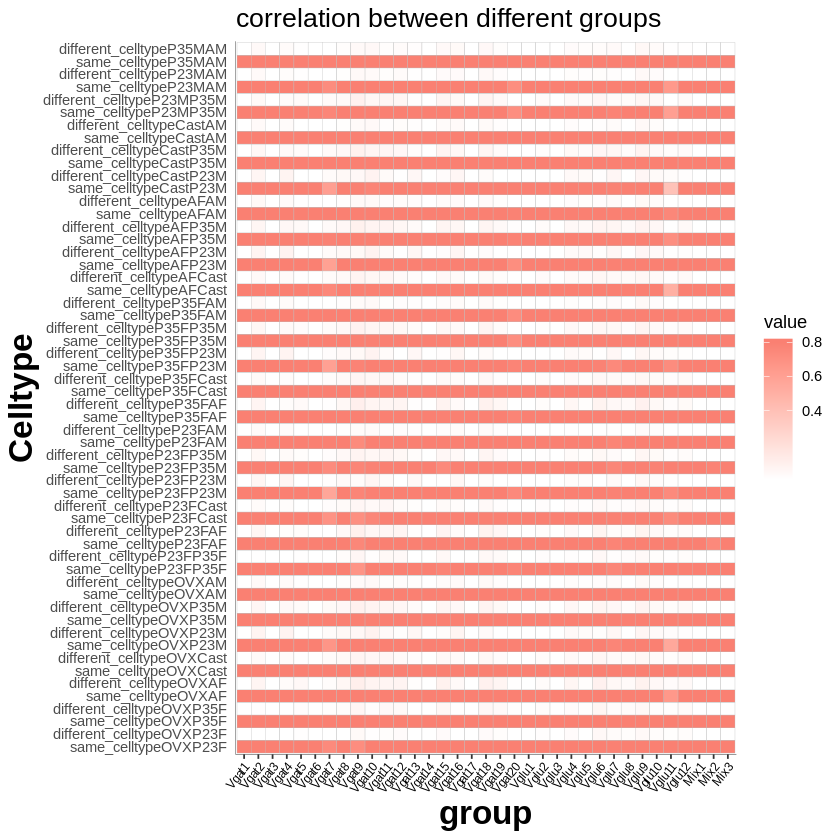

In [123]:
p <-  ggplot(test.m, aes(Var1,Var2, fill= value)) + 
  geom_tile(color = "gray")+ scale_fill_continuous(limits=c(-0, 0.8), breaks=seq(0.4,1,by=0.2),low = "white",high = "salmon", oob=squish)
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+ylab("Celltype")+xlab("group")+theme(axis.text.x=element_text(size=7,angle = 50, hjust =1,colour = "black"),axis.title=element_text(size=20,face="bold"),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black", size = 0.1),axis.ticks.y = element_blank())+ggtitle("correlation between different groups")
pp
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/celltype simillarity.pdf",width=10,height=10)

In [ ]:
#use below

In [57]:
Celltype<-c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20","Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12","Mix1","Mix2","Mix3")
row_type<-"AF"
col_type<-"OVX"

col<-Celltype
row<-Celltype
corr<- data.frame(matrix(NA, ncol=length(col),nrow=length(row)))
rownames(corr)<-factor(row,levels=row)
colnames(corr)<-factor(col,levels=col)
p_value<- data.frame(matrix(NA, ncol=length(col),nrow=length(row)))
rownames(p_value)<-factor(row,levels=row)
colnames(p_value)<-factor(col,levels=col)
col_exp<-MPOA.integrated@assays$integrated@data[,rownames(subset(MPOA.integrated@meta.data,stim==col_type))]
row_exp<-MPOA.integrated@assays$integrated@data[,rownames(subset(MPOA.integrated@meta.data,stim==row_type))]
col_exp<-col_exp[rowSums(as.matrix(col_exp))>0,]
row_exp<-row_exp[rowSums(as.matrix(row_exp))>0,]
common_genes<-intersect(rownames(col_exp),rownames(row_exp))
col_exp<-col_exp[common_genes,]
row_exp<-row_exp[common_genes,]
col_exp<-t(scale(t(as.matrix(col_exp))))
row_exp<-t(scale(t(as.matrix(row_exp))))
for (i in 1:length(col)){
    for (j in 1:length(row)){
    corr[j,i]<-cor(rowMeans(as.matrix(col_exp[,eval(parse(text = paste(col[i],"_barcode_",col_type,sep="")))])),rowMeans(as.matrix(row_exp[,eval(parse(text = paste(row[j],"_barcode_",row_type,sep="")))])))
}}
for (i in 1:length(col)){
    for (j in 1:length(row)){
   p_value[j,i]<-cor.test(rowMeans(as.matrix(col_exp[,eval(parse(text = paste(col[i],"_barcode_",col_type,sep="")))])),rowMeans(as.matrix(row_exp[,eval(parse(text = paste(row[j],"_barcode_",row_type,sep="")))])))$p.value
}}
test.m <- melt(as.matrix(corr))
test.p <- melt(as.matrix(p_value))
for(i in 1:dim(test.m)[1]){
    if (test.p$value[i]>0.01){
        test.m$value[i]<-0
    }else{
        test.m$value[i]<-test.m$value[i]
    }
}




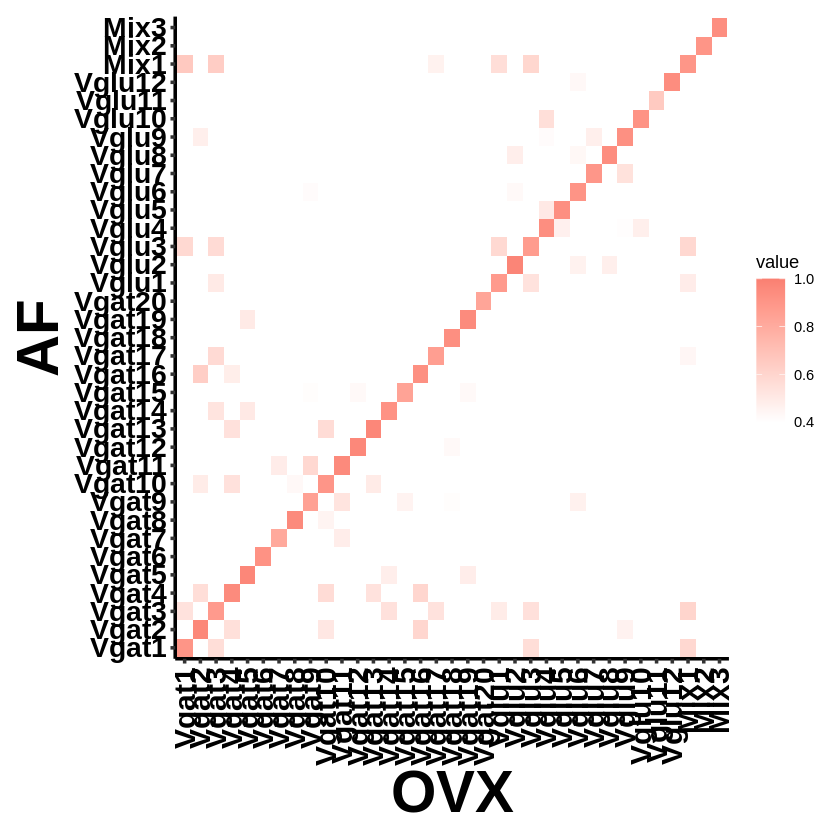

In [58]:
p <-  ggplot(test.m, aes(Var2,Var1, fill= value)) + 
  geom_tile()+ scale_fill_continuous(limits=c(0.4, 1), breaks=seq(0.4,1,by=0.2),low = "white",high = "salmon", oob=squish)
#scale_x_discrete(breaks=c(0,5994,7712,9820,11428,11674,11836,11878))
pp<-p+ylab(row_type)+xlab(col_type)+theme(axis.text.y=element_text(size=17, hjust =1,colour = "black",face="bold"),axis.text.x=element_text(size=18,angle = 90, hjust =1,vjust=0.5,colour = "black",face="bold"),axis.title=element_text(size=35,face="bold"),plot.title = element_text(size=16),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black", size = 1),axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 10, 10, 10))
ggsave(file=paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/correlation",row_type,col_type,".pdf",sep=""),width=10,height=10,paper="letter")
print(pp)